In [121]:
import numpy as np
import pandas as pd
from math import exp
from math import log
import matplotlib.pyplot as plt

In [181]:
def scale_data():
    for i in data.columns:
        if i != "Outcome":
            data[i] = data[i] - data[i].mean() / (data[i].max() - data[i].min())
#     data['Glucose'] = data['Glucose'] - data["Glucose"].mean() / (data["Glucose"].max() - data["Glucose"].min())
#     data['BloodPressure'] = data['BloodPressure'] - data["BloodPressure"].mean() / (data["BloodPressure"].max() - data["BloodPressure"].min())
#     data['SkinThickness'] = data['SkinThickness'] - data["SkinThickness"].mean() / (data["SkinThickness"].max() - data["SkinThickness"].min())
#     data['Insulin'] = data['Insulin'] - data["Insulin"].mean() / (data["Insulin"].max() - data["Insulin"].min())
#     data['BMI'] = data['BMI'] - data["BMI"].mean() / (data["BMI"].max() - data["BMI"].min())
#     data['DiabetesPedigreeFunction'] = data['DiabetesPedigreeFunction'] - data["DiabetesPedigreeFunction"].mean() / (data["DiabetesPedigreeFunction"].max() - data["DiabetesPedigreeFunction"].min())
#     data['Age'] = data['Age'] - data["Age"].mean() / (data["Age"].max() - data["Age"].min())

In [182]:
def plot_data():
    # y = target values, last column of the data frame
    y = data.iloc[:, -1]
    # filter out the applicants that got admitted
    has_diabetes = data.loc[y == 1]

    # filter out the applicants that din't get admission
    no_diabetes = data.loc[y == 0]

    # plots
    plt.scatter(has_diabetes.iloc[:, 0], has_diabetes.iloc[:, 1], s=10, label='has_diabetes')
    plt.scatter(no_diabetes.iloc[:, 0], no_diabetes.iloc[:, 1], s=10, label='no_diabetes')
    plt.legend()
    plt.show()

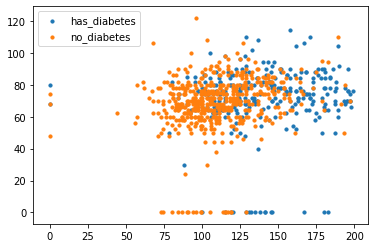

Glucose  BloodPressure  SkinThickness     Insulin       BMI  \
0    147.39249      71.433562      34.792561   -0.094326  33.12321   
1     84.39249      65.433562      28.792561   -0.094326  26.12321   
2    182.39249      63.433562      -0.207439   -0.094326  22.82321   
3     88.39249      65.433562      22.792561   93.905674  27.62321   
4    136.39249      39.433562      34.792561  167.905674  42.62321   
..         ...            ...            ...         ...       ...   
763  100.39249      75.433562      47.792561  179.905674  32.42321   
764  121.39249      69.433562      26.792561   -0.094326  36.32321   
765  120.39249      71.433562      22.792561  111.905674  25.72321   
766  125.39249      59.433562      -0.207439   -0.094326  29.62321   
767   92.39249      69.433562      30.792561   -0.094326  29.92321   

     DiabetesPedigreeFunction        Age  Outcome  
0                    0.425516  49.445985        1  
1                    0.149516  30.445985        0  
2                    0.470516  31.445985        1  
3                   -0.034484  20.445985        0  
4                    2.086516  32.445985        1  
..                        ...        ...      ...  
763                 -0.030484  62.445985        0  
764                  0.138516  26.445985        0  
765                  0.043516  29.445985        0  
766                  0.147516  46.445985        1  
767                  0.113516  22.445985        0  

[768 rows x 8 columns]

In [183]:
data = pd.read_csv("diabetes_data.csv", index_col = None, header = 0)
# print(data)
plot_data()
scale_data()
data

In [184]:
# 70% of the data assigned to the train set
train_size = int(0.7*len(data))
train_set = data[:train_size]

# 30% of the data assigned to the test set
test_size = int(0.3*len(data))
test_set = data[train_size:len(data)]

In [189]:
X = train_set.iloc[:, :-1].values # Taking out all the features (except for output column) from the data and storing into X
Y = train_set.iloc[:, -1].values  # The column that contains the result/output
Y = Y.reshape((-1, 1)) # making the array n*1 shape

In [190]:
# def sigmoid(z):
#     g = (1 / (1 + np.exp(-z)))
#     return g

def sigmoid(x):
    sig = 1 / (1 + np.exp(-x))     # Define sigmoid function
    sig = np.minimum(sig, 0.9999)  # Set upper bound
    sig = np.maximum(sig, 0.0001)  # Set lower bound
    return sig

def loss_function(hypotheses, Y):
    m = len(X)
    h = hypotheses
#     j = -sum(Y * np.log(h) + (1 - Y) * np.log(1 - h)) / m
    return -np.mean((Y * np.log(h) + (1 - Y) * np.log(1 - h)))

def predict(test_data):
    predictions = []
    Z = np.dot(test_data, theta) + bias
    for i in sigmoid(Z):
        if i > 0.5:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [191]:
# Initialization part
np.random.seed(0) # prevents from having different random nums each time code runs
theta = np.random.uniform(0, 1, size = (X.shape[1], 1)) #this is our weight vectors
bias = 0.5
alpha = 0.05
m = len(X)
j = 1 # initialising the cost with random value
converge_change = 0.005 #this is the least value we want for j/cost to be

In [195]:
# Algorithm in action
# while j > converge_change:
for i in range(100000):
    hypotheses = np.dot(X, theta) + bias # return an array containing our hypotheses
    hypotheses = sigmoid(hypotheses)
    #     print(hypotheses, Y)
    j = loss_function(hypotheses, Y)
    print("------------->",j)
    grad= hypotheses - Y
    grad_weight= np.dot(X.T,grad)/X.shape[0]
    theta=theta-.01*grad_weight
#     theta = theta - (alpha * sum(np.dot(X.T, (hypotheses - Y)))) / m

-------------> 5.968747393655146
-------------> 5.968747393655146
-------------> 5.903684805289488
-------------> 3.2589507646746108
-------------> 5.110850367693016
-------------> 3.2797772838575145
-------------> 5.762363929066333
-------------> 3.251309242691459
-------------> 3.7739445303338113
-------------> 5.227355361615686
-------------> 3.241761311164344
-------------> 4.19496183630527
-------------> 3.2430694712948442
-------------> 5.964876785285371
-------------> 3.2124120374416365
-------------> 3.201036405890683
-------------> 5.968747393655146
-------------> 3.2198806400877507
-------------> 4.1685297131774846
-------------> 3.2111673024522513
-------------> 5.909616428920158
-------------> 3.241692983321442
-------------> 2.869668406231654
-------------> 5.968747393655146
-------------> 3.238419399502386
-------------> 4.602413319573071
-------------> 3.241692983321442
-------------> 3.860162005385727
-------------> 3.228362971714523
-------------> 5.82704477961831
----

-------------> 3.183183946068938
-------------> 2.837231876040235
-------------> 3.165677909671059
-------------> 5.372154115392188
-------------> 3.241692983321442
-------------> 2.5037154524967855
-------------> 5.788593636377441
-------------> 3.2374206189223123
-------------> 2.5225314586248504
-------------> 2.9310455382522886
-------------> 5.935314712830572
-------------> 3.0677836920089785
-------------> 3.5733707999987803
-------------> 3.062866036203971
-------------> 3.4669415248454607
-------------> 3.0644114803222036
-------------> 3.316013797555859
-------------> 3.063305738790209
-------------> 3.3713441323788933
-------------> 3.077216076047029
-------------> 3.1668612965093574
-------------> 3.0640772799180476
-------------> 3.666738989721522
-------------> 3.1867535160118785
-------------> 2.368354113717255
-------------> 3.2461847588743793
-------------> 5.900026414890976
-------------> 3.2306513517057285
-------------> 2.500189424795214
-------------> 3.258274706630

-------------> 5.742487560135958
-------------> 3.24081193675017
-------------> 2.450401990977367
-------------> 2.6432905659749135
-------------> 5.907548740515094
-------------> 3.194198817596793
-------------> 3.1485134833233257
-------------> 3.159102183952282
-------------> 5.256243272871944
-------------> 3.241692983321442
-------------> 2.4371965003540854
-------------> 4.519476377267782
-------------> 3.2343609940628038
-------------> 2.3958906386834506
-------------> 5.77421829824842
-------------> 3.23613158312209
-------------> 2.733714388147352
-------------> 3.225257743481908
-------------> 5.932873334543802
-------------> 3.0662951347838585
-------------> 3.3385080444273294
-------------> 3.1072023872294205
-------------> 3.8751682902650697
-------------> 3.144576332996118
-------------> 2.516697723800003
-------------> 3.2479302063003166
-------------> 5.856508880160859
-------------> 3.219381372995106
-------------> 2.3381209410755743
-------------> 2.869020183660212
--

-------------> 3.2400379617119697
-------------> 2.4250993796297573
-------------> 5.8388411330147045
-------------> 3.237595399042105
-------------> 2.8177295064158923
-------------> 3.255236769913058
-------------> 5.921659039885771
-------------> 3.1473705633781006
-------------> 2.943700455000905
-------------> 3.159975392203071
-------------> 5.141008734758519
-------------> 3.241693090110398
-------------> 2.4498049683975993
-------------> 5.618499302137947
-------------> 3.2390769098804038
-------------> 2.4069943209883196
-------------> 2.3953964449547587
-------------> 3.2435750138920607
-------------> 5.922250862643014
-------------> 3.156647555707936
-------------> 3.3472370239072227
-------------> 3.119756094604899
-------------> 4.443248968547359
-------------> 3.235353584902332
-------------> 2.3619279750052953
-------------> 2.6492776305223966
-------------> 5.909717187645094
-------------> 3.1927451627274697
-------------> 3.148108207527624
-------------> 3.158299468505

-------------> 2.6544407918643493
-------------> 5.915279372366702
-------------> 3.21461047864832
-------------> 3.0090334097118743
-------------> 3.159431236145598
-------------> 5.411674504304309
-------------> 3.241692983321442
-------------> 2.456188113461882
-------------> 5.552992838251698
-------------> 3.241692983321442
-------------> 2.435958606915759
-------------> 5.554248946852446
-------------> 3.241693041410502
-------------> 2.401712133320775
-------------> 4.612162933641239
-------------> 3.2361773200518713
-------------> 2.4060443879062174
-------------> 5.759162905666818
-------------> 3.2356587210846177
-------------> 2.6938543169071525
-------------> 3.1725115796175722
-------------> 5.9345295315801065
-------------> 3.0640955372793615
-------------> 3.410702908362921
-------------> 3.0919665134575633
-------------> 3.670926528521894
-------------> 3.0866721968337574
-------------> 2.866698265533162
-------------> 3.1583200443639314
-------------> 5.041157847137617

-------------> 3.861548465963652
-------------> 3.1836599061597455
-------------> 2.2732854641968196
-------------> 3.2449659036823153
-------------> 5.934671026041007
-------------> 3.1089318457313575
-------------> 3.292539517290392
-------------> 3.0775140706768775
-------------> 3.8122082390726884
-------------> 3.1798029622902573
-------------> 2.4222865705156855
-------------> 3.2502293952075223
-------------> 5.899014192200716
-------------> 3.2127558041620197
-------------> 2.48682037774462
-------------> 3.258844786616615
-------------> 5.929698491147879
-------------> 3.13452987860717
-------------> 2.888682214592747
-------------> 3.1579475779923465
-------------> 5.129372622743744
-------------> 3.241692983321442
-------------> 2.5270176293586855
-------------> 5.838297509278264
-------------> 3.2204298765363686
-------------> 2.676864027062525
-------------> 3.246200176581629
-------------> 5.92602617263827
-------------> 3.077309368881256
-------------> 2.9910397295063573

-------------> 4.402525885426137
-------------> 3.241692983321442
-------------> 2.6736837611573874
-------------> 3.150004255405254
-------------> 5.940262517514545
-------------> 3.0822955091213364
-------------> 3.9556111526625175
-------------> 3.211681643232903
-------------> 2.5738729638419264
-------------> 3.2167774748431883
-------------> 5.852108895834628
-------------> 3.2398573028022715
-------------> 2.251990641189359
-------------> 2.213940904152078
-------------> 3.4954326311456656
-------------> 3.1472698305473408
-------------> 4.021408388092145
-------------> 3.2416931938984233
-------------> 2.1371726931914097
-------------> 2.657586223096444
-------------> 5.928233751516958
-------------> 3.228271098492165
-------------> 3.4046104761544305
-------------> 3.0733834003991842
-------------> 4.576941754789741
-------------> 3.241692983321442
-------------> 2.3817687072792446
-------------> 5.381395626056442
-------------> 3.241692983321442
-------------> 2.8922277628723

-------------> 3.231242538601089
-------------> 5.852492285265058
-------------> 3.231169437339232
-------------> 2.354666362721772
-------------> 2.836530304237355
-------------> 5.933484151521276
-------------> 3.11945900765248
-------------> 3.482132261155833
-------------> 3.0683889929885946
-------------> 3.7605932860784717
-------------> 3.1448896819491625
-------------> 2.757554788273779
-------------> 3.1620219215793286
-------------> 5.405155291446359
-------------> 3.241692983321442
-------------> 2.551771791218351
-------------> 5.861968091729896
-------------> 3.215305497985615
-------------> 2.7405005794064574
-------------> 3.2588442689210275
-------------> 5.895601227068737
-------------> 3.1537924716321086
-------------> 2.6281685604573646
-------------> 3.2576421299599163
-------------> 5.859026378651492
-------------> 3.1852372906583972
-------------> 2.3695713293386422
-------------> 2.9723335923443104
-------------> 5.933760513669949
-------------> 3.065284248097975

-------------> 3.0178749434251237
-------------> 3.091517100425834
-------------> 4.237540469830434
-------------> 3.2392168701436685
-------------> 2.2065518998756963
-------------> 5.1192048709753495
-------------> 3.241692983321442
-------------> 2.5853352440968758
-------------> 5.8813718137003415
-------------> 3.2260783556958854
-------------> 2.7141835838018227
-------------> 3.2563488139506482
-------------> 5.8985865856293245
-------------> 3.1924737424319263
-------------> 2.54567680781799
-------------> 3.258430908435222
-------------> 5.900028233455072
-------------> 3.1736906727059924
-------------> 2.499762939745002
-------------> 3.2588442689210275
-------------> 5.903629607166069
-------------> 3.154417419800607
-------------> 2.58585351540757
-------------> 3.2530060974143784
-------------> 5.851385771629755
-------------> 3.2048873435626644
-------------> 2.3338938853108027
-------------> 2.877234100996406
-------------> 5.929718845236783
-------------> 3.080358796068

-------------> 2.410630295116559
-------------> 5.628622942711287
-------------> 3.241692983321442
-------------> 2.4330088884182213
-------------> 5.4916827085752695
-------------> 3.241692983321442
-------------> 2.503767629451912
-------------> 5.79877647812074
-------------> 3.234568655441399
-------------> 2.524837391825531
-------------> 2.9666898677901616
-------------> 5.93571807223875
-------------> 3.0645801612720414
-------------> 3.5702409750181636
-------------> 3.064190184232905
-------------> 3.4216940317407087
-------------> 3.0644395556361324
-------------> 3.342199269616938
-------------> 3.065518675256597
-------------> 3.286593982901246
-------------> 3.0676671217893743
-------------> 3.334751074946826
-------------> 3.0853272027554075
-------------> 3.154158979093576
-------------> 3.065258078711392
-------------> 3.7398279151206655
-------------> 3.208449009010151
-------------> 2.1608307039707433
-------------> 3.228869410880031
-------------> 5.935069973019064
-

-------------> 3.1370126734233508
-------------> 5.93870144444052
-------------> 3.071339176612514
-------------> 4.046330343435725
-------------> 3.1709808953419047
-------------> 3.2318304377918623
-------------> 3.1223239405711114
-------------> 4.596886215791831
-------------> 3.2416931663973063
-------------> 2.341031049412834
-------------> 3.284268600652843
-------------> 3.077660611181932
-------------> 3.379470255097189
-------------> 3.1131067389540052
-------------> 3.0204943447767483
-------------> 3.0776053497859293
-------------> 4.210193874746802
-------------> 3.2409004546268365
-------------> 2.2048750112452358
-------------> 5.242898217454431
-------------> 3.241692983321442
-------------> 2.5890063434380606
-------------> 5.882901386611029
-------------> 3.230416952429884
-------------> 2.673232698269646
-------------> 3.258250071274732
-------------> 5.915351141766333
-------------> 3.179226044504956
-------------> 2.6650080901193114
-------------> 3.214570633735014

-------------> 3.512712744588459
-------------> 3.069086655332409
-------------> 3.099773775375308
-------------> 3.0987384814537817
-------------> 3.973078464124129
-------------> 3.2126009418051726
-------------> 2.089405763488117
-------------> 2.521464669393945
-------------> 5.898270109306337
-------------> 3.2312423065440004
-------------> 3.093592275698908
-------------> 3.1697958517169207
-------------> 5.622478237886718
-------------> 3.241692983321442
-------------> 2.436239182900779
-------------> 3.64048681419678
-------------> 3.171293940452833
-------------> 2.3573548832755318
-------------> 3.2332666849641054
-------------> 5.892858000247583
-------------> 3.230770632953429
-------------> 2.480101096994564
-------------> 3.2438046400450053
-------------> 5.935502064201995
-------------> 3.107840396382191
-------------> 3.3182900465468483
-------------> 3.065048181691946
-------------> 3.632143365910402
-------------> 3.153756963119556
-------------> 2.601573563987496
---

-------------> 3.2532615849449513
-------------> 3.0662374085237314
-------------> 3.428531967503375
-------------> 3.111096523435751
-------------> 2.8894279688530156
-------------> 3.1233618030494523
-------------> 4.8522964171702565
-------------> 3.241692983321442
-------------> 2.5995798869703783
-------------> 5.9076438988938484
-------------> 3.1903192058565875
-------------> 3.232160053632547
-------------> 3.1547084412702704
-------------> 5.082572540779917
-------------> 3.241692983321442
-------------> 2.4400570369303063
-------------> 4.1151645701042145
-------------> 3.214044391572697
-------------> 2.139142749534783
-------------> 4.215229063816019
-------------> 3.2354375852800814
-------------> 2.1390250634307786
-------------> 2.5155780535599988
-------------> 3.1648845412922157
-------------> 5.774801479798812
-------------> 3.241692983321442
-------------> 2.364081653806957
-------------> 3.6312408382930017
-------------> 3.2144540801620147
-------------> 2.212111279

-------------> 3.121844715225744
-------------> 3.127681158435798
-------------> 3.0923992680013854
-------------> 4.031012637539574
-------------> 3.224168124518324
-------------> 2.0903611695454494
-------------> 2.3378548783027964
-------------> 5.760103488820746
-------------> 3.241692983321442
-------------> 2.697159155723576
-------------> 2.9566809141520247
-------------> 5.936881045359481
-------------> 3.088856736798959
-------------> 3.959504261849481
-------------> 3.1960944856371962
-------------> 2.8155058013294068
-------------> 3.159755105724982
-------------> 5.451674217900235
-------------> 3.241692983321442
-------------> 2.5490731303796337
-------------> 5.859569411353395
-------------> 3.226293912731968
-------------> 2.6540300974584246
-------------> 3.2519003572081155
-------------> 5.928167123031377
-------------> 3.1004138433171025
-------------> 2.9878349353259113
-------------> 3.155346257066479
-------------> 4.838066211100195
-------------> 3.240723185403857

-------------> 2.4221111752363007
-------------> 5.468633017586649
-------------> 3.2341918735972994
-------------> 2.400073411392788
-------------> 2.5751421613009784
-------------> 3.228907998614634
-------------> 5.788109293563943
-------------> 3.2308365225742457
-------------> 2.4654910187568766
-------------> 2.8671534835118937
-------------> 5.931282038347959
-------------> 3.0868492233191263
-------------> 3.410664725409593
-------------> 3.0988334663751855
-------------> 3.9064545783145164
-------------> 3.1568407899919118
-------------> 2.5694151350099266
-------------> 3.2315000182188425
-------------> 5.8178450658511265
-------------> 3.2304945057563477
-------------> 2.2863542884804127
-------------> 2.2900708929484397
-------------> 5.094014517526934
-------------> 3.241692983321442
-------------> 2.539933942710198
-------------> 2.2548252023362556
-------------> 2.9039192034666366
-------------> 5.931417242366779
-------------> 3.1391824337989553
-------------> 4.0252833

-------------> 2.583002478741157
-------------> 2.7225878020853824
-------------> 3.1319152194822717
-------------> 5.56245378521457
-------------> 3.241692983321442
-------------> 2.5575304386643203
-------------> 5.1206668805061035
-------------> 3.241692983321442
-------------> 2.9046128265216478
-------------> 5.935878667177515
-------------> 3.0963033843239036
-------------> 4.00105836489788
-------------> 3.16639013062311
-------------> 3.3762973489343873
-------------> 3.0870097196228663
-------------> 4.1487373507999115
-------------> 3.2269743079345288
-------------> 2.3393003976754994
-------------> 3.056947450628584
-------------> 5.940643660879756
-------------> 3.0670302480466165
-------------> 3.802073194294394
-------------> 3.1484499774358143
-------------> 2.88511355732464
-------------> 3.1486203977643026
-------------> 5.049022055851082
-------------> 3.241692983321442
-------------> 2.5703974320727294
-------------> 5.8792695930663275
-------------> 3.20366390889916

-------------> 3.119638239546375
-------------> 2.848959568092762
-------------> 3.1766572718912105
-------------> 5.339908443752955
-------------> 3.241088268705235
-------------> 2.4301692503604566
-------------> 5.525236839304856
-------------> 3.238894821836642
-------------> 2.397547821502908
-------------> 3.1674959039685247
-------------> 3.0982235855950493
-------------> 3.767801253799344
-------------> 3.1659386525986744
-------------> 2.3171656979144224
-------------> 3.258831580603947
-------------> 5.923995211099097
-------------> 3.166698442622216
-------------> 2.8454105879847638
-------------> 3.1637896121089613
-------------> 5.372695736094499
-------------> 3.241692983321442
-------------> 2.4845834098743587
-------------> 5.745996600755954
-------------> 3.23585518906851
-------------> 2.4676398892475975
-------------> 2.809483391753215
-------------> 5.924099213486576
-------------> 3.126998020628301
-------------> 3.3307575555073607
-------------> 3.120806128607304


-------------> 3.19969493247064
-------------> 3.15605563258053
-------------> 4.924507158657065
-------------> 3.2416932331999235
-------------> 2.4105464039368556
-------------> 3.675255570594535
-------------> 3.1235053326550895
-------------> 2.3811467537214512
-------------> 3.2540942460027713
-------------> 5.8926943858110254
-------------> 3.203640909522407
-------------> 2.560306044681736
-------------> 3.2588442689210275
-------------> 5.914920906177488
-------------> 3.1503224414372744
-------------> 2.6441238427313127
-------------> 3.225180185734081
-------------> 5.745023135109259
-------------> 3.2344148795978027
-------------> 2.2944727726641445
-------------> 3.0063121899583556
-------------> 3.116945869568096
-------------> 4.488341563224667
-------------> 3.240741751035427
-------------> 2.3190831318235046
-------------> 5.464114999779001
-------------> 3.241692983321442
-------------> 2.4431903043086973
-------------> 5.399051983376682
-------------> 3.24169298332144

-------------> 2.8029831741042757
-------------> 5.933590301416306
-------------> 3.118491437172259
-------------> 3.8051154135099083
-------------> 3.0753943631507688
-------------> 3.8127337860976196
-------------> 3.1079035798575885
-------------> 3.2704408690596383
-------------> 3.08353136337001
-------------> 3.830432705068658
-------------> 3.182374926822063
-------------> 2.393592081018624
-------------> 3.255428795696968
-------------> 5.9124851899341415
-------------> 3.194320874265009
-------------> 2.6056964057284344
-------------> 3.2363676158390855
-------------> 5.862535538452548
-------------> 3.2271568410227807
-------------> 2.2738390066455136
-------------> 2.7472531401939277
-------------> 5.926557060068408
-------------> 3.168914450452196
-------------> 3.300194153714576
-------------> 3.112842063258081
-------------> 4.426954486605381
-------------> 3.2383426574499046
-------------> 2.3115018045491293
-------------> 2.338007483555329
-------------> 5.5623747931809

-------------> 3.241692983321442
-------------> 2.5241383324540534
-------------> 2.472433909806553
-------------> 3.1994908285797936
-------------> 5.891458685355038
-------------> 3.2403086621829065
-------------> 2.863356623489358
-------------> 3.21618589685849
-------------> 5.887673032506149
-------------> 3.2361224534628232
-------------> 2.463804514874975
-------------> 3.210381990042484
-------------> 5.936263663039695
-------------> 3.0870825093736833
-------------> 3.641252801333228
-------------> 3.1299286985317756
-------------> 3.0230269617545065
-------------> 3.0987080878870885
-------------> 4.29941215801387
-------------> 3.2391790263911213
-------------> 2.2375189984084867
-------------> 5.283540680331047
-------------> 3.241692983321442
-------------> 2.531467701469038
-------------> 5.837587468902547
-------------> 3.2368526758622327
-------------> 2.455181973712792
-------------> 2.9128865784560913
-------------> 5.93567329069375
-------------> 3.0850349829972723


-------------> 5.333027664636988
-------------> 3.241692983321442
-------------> 2.6191666771631437
-------------> 5.896794755398854
-------------> 3.1707129330878083
-------------> 3.163404777839655
-------------> 3.1665344786965495
-------------> 5.247448222593243
-------------> 3.2408387708944733
-------------> 2.4235174960671815
-------------> 2.945575012022792
-------------> 3.144038334479868
-------------> 4.839622584731134
-------------> 3.2416930688449903
-------------> 2.46453975166927
-------------> 5.774698449024457
-------------> 3.2341779483758244
-------------> 2.5058168718632468
-------------> 2.8958114462263755
-------------> 5.932450062903549
-------------> 3.0781985122333255
-------------> 3.460400943947175
-------------> 3.081877636115073
-------------> 3.7043334280351727
-------------> 3.1031313897948687
-------------> 2.8743120832849414
-------------> 3.1541240392867556
-------------> 5.0260598161635235
-------------> 3.241692983321442
-------------> 2.555071821292

-------------> 3.2416932210740863
-------------> 2.4185140815372996
-------------> 4.452856929695108
-------------> 3.224967760217443
-------------> 2.318328976901419
-------------> 5.612998513548558
-------------> 3.2404062829808797
-------------> 2.507750712779697
-------------> 2.5833491376471014
-------------> 5.881098153146915
-------------> 3.2005020059299634
-------------> 2.982855967550065
-------------> 3.2132299128392536
-------------> 5.677699102530501
-------------> 3.2347778334505635
-------------> 2.4161410711282896
-------------> 2.340644371520347
-------------> 5.423127806546229
-------------> 3.241692983321442
-------------> 2.5733571812213096
-------------> 2.5262295674195423
-------------> 5.869949495048971
-------------> 3.2254377619739625
-------------> 2.8879048293208474
-------------> 3.24637590135856
-------------> 5.865574305872508
-------------> 3.213988321952329
-------------> 2.550257720248939
-------------> 3.2304406135393426
-------------> 5.93336690648136

-------------> 3.235414114072788
-------------> 2.595373419727073
-------------> 3.1074231814299687
-------------> 5.937747226367486
-------------> 3.0638706312249786
-------------> 3.556612169244765
-------------> 3.064754205246137
-------------> 3.348294659089353
-------------> 3.0654202115664315
-------------> 3.3905560900242193
-------------> 3.0724040227537692
-------------> 3.1559716393013417
-------------> 3.068870256867007
-------------> 3.6908607139947938
-------------> 3.1863986587523367
-------------> 2.298375647542546
-------------> 3.2540905168942453
-------------> 5.921953059528489
-------------> 3.202476492868686
-------------> 2.7541060612927475
-------------> 3.1765837836825717
-------------> 5.62861859800214
-------------> 3.241692983321442
-------------> 2.4430652982185666
-------------> 5.6712423241463865
-------------> 3.241693028947629
-------------> 2.388732621149894
-------------> 2.6837687722907053
-------------> 3.1662392206438836
-------------> 5.617000864115

-------------> 3.2397987178862873
-------------> 2.416926692644895
-------------> 5.415724549754871
-------------> 3.2383444166693653
-------------> 2.3838195246909595
-------------> 4.690073047563784
-------------> 3.2294993093456026
-------------> 2.386806957425878
-------------> 5.59665412593767
-------------> 3.236352162865193
-------------> 2.4587380658150795
-------------> 2.3872412143399395
-------------> 5.643947998609626
-------------> 3.2409605798532843
-------------> 2.664154024126155
-------------> 2.9199679447812463
-------------> 5.932511130692238
-------------> 3.070502886319621
-------------> 3.5116656890924585
-------------> 3.082372050286632
-------------> 3.651248185447453
-------------> 3.0818861873266843
-------------> 3.0314990991483297
-------------> 3.1231135279137927
-------------> 4.397667342433978
-------------> 3.2340399773354527
-------------> 2.2430138108847464
-------------> 4.967137931689002
-------------> 3.241692983321442
-------------> 2.4941848805608

-------------> 3.2405958098422114
-------------> 2.4136341677173485
-------------> 2.8402278354846993
-------------> 3.1587923133514475
-------------> 5.216439431098714
-------------> 3.241692983321442
-------------> 2.4914445547301765
-------------> 5.765324908729521
-------------> 3.234325292048047
-------------> 2.4907976427312595
-------------> 2.869520029902441
-------------> 5.930446096246027
-------------> 3.085823535799773
-------------> 3.4177039351507283
-------------> 3.0966070395228673
-------------> 3.895104477864038
-------------> 3.1522525625079374
-------------> 2.6016853359299272
-------------> 3.220816890076415
-------------> 5.766190866198364
-------------> 3.236225314780003
-------------> 2.2843362025159597
-------------> 2.844033923165998
-------------> 3.144307998641827
-------------> 5.123220619243291
-------------> 3.241692983321442
-------------> 2.56133613200587
-------------> 5.866938196644825
-------------> 3.2228254622457513
-------------> 2.706350799160268

-------------> 2.3820727951058096
-------------> 5.756292097464854
-------------> 3.241692983321442
-------------> 2.4625253320345237
-------------> 2.6718093152656595
-------------> 5.920955391503409
-------------> 3.197654428654482
-------------> 3.2652134740852854
-------------> 3.11970125810955
-------------> 4.718025772878037
-------------> 3.241692983321442
-------------> 2.382597021649582
-------------> 4.0337931709498305
-------------> 3.2265659060233394
-------------> 2.11131397233052
-------------> 4.348520887110147
-------------> 3.241692983321442
-------------> 2.211033973601843
-------------> 4.573829591333616
-------------> 3.241692983321442
-------------> 2.5639117836251204
-------------> 5.917925913833849
-------------> 3.2126829985576184
-------------> 3.3756801071736087
-------------> 3.1228082602793834
-------------> 4.884772601528283
-------------> 3.241692983321442
-------------> 2.4438874869783236
-------------> 3.611946525878847
-------------> 3.1678427855329856


-------------> 3.218236437277368
-------------> 2.080220778232996
-------------> 2.822811278357859
-------------> 5.93201049549237
-------------> 3.1471777469514426
-------------> 3.9117439307034227
-------------> 3.166956710115921
-------------> 3.427904819967246
-------------> 3.0675927727347196
-------------> 3.915004891323626
-------------> 3.215178899910578
-------------> 2.342379187730935
-------------> 3.2529199644653026
-------------> 5.933815710547928
-------------> 3.1430188891842628
-------------> 3.183161047754759
-------------> 3.0772346557507015
-------------> 3.966058192172553
-------------> 3.223825424139911
-------------> 2.1184486757921053
-------------> 2.8287548086338323
-------------> 5.932031081726907
-------------> 3.1465545098581136
-------------> 3.7408617886912796
-------------> 3.124756563030132
-------------> 3.5154452333211568
-------------> 3.094492918490757
-------------> 3.393202227959106
-------------> 3.0897783386025957
-------------> 3.243529093734482

-------------> 3.241692996197586
-------------> 2.4308289129680594
-------------> 5.506376697721351
-------------> 3.2416455105379582
-------------> 2.3860802832565287
-------------> 4.609109596148824
-------------> 3.2336240092708257
-------------> 2.3863452943288017
-------------> 5.69657937752926
-------------> 3.237675328642035
-------------> 2.580368417634551
-------------> 2.9046373501761473
-------------> 5.930083749001092
-------------> 3.0724579103257454
-------------> 3.4235107155300537
-------------> 3.1019130451190753
-------------> 3.8741108161853823
-------------> 3.1321342245690986
-------------> 2.6570097862804714
-------------> 3.2092619884075355
-------------> 5.66928917913137
-------------> 3.2396712164247754
-------------> 2.34807975087046
-------------> 5.062186456702439
-------------> 3.2416931878669133
-------------> 2.474633252920221
-------------> 5.72686042861513
-------------> 3.2328009418261576
-------------> 2.4787617528321944
-------------> 2.8344127490187

-------------> 5.936716869332256
-------------> 3.0667564883065896
-------------> 3.5336073483591552
-------------> 3.0659119416262604
-------------> 3.3801927664507163
-------------> 3.0665704187574057
-------------> 3.341888502633622
-------------> 3.067045157367083
-------------> 3.2652910397890005
-------------> 3.067426847318346
-------------> 3.379743464967261
-------------> 3.0990725638560193
-------------> 2.991006471275155
-------------> 3.0950197407904914
-------------> 4.366510887715028
-------------> 3.241693154311607
-------------> 2.299158944777727
-------------> 5.60533614946833
-------------> 3.241692983321442
-------------> 2.456210244807287
-------------> 4.890287782782477
-------------> 3.241692983321442
-------------> 2.7383822907273054
-------------> 5.926423139712318
-------------> 3.135478627143315
-------------> 3.637286170986945
-------------> 3.0859927456816756
-------------> 4.057572430140977
-------------> 3.177963911204601
-------------> 2.781234932854282
-

-------------> 3.0847008019703623
-------------> 3.38891906690788
-------------> 3.1307333023870996
-------------> 2.9522037585447642
-------------> 3.0945745538291747
-------------> 4.512063159626551
-------------> 3.241692983321442
-------------> 2.424165534843068
-------------> 5.860915366879322
-------------> 3.2396754599882547
-------------> 2.680896185171801
-------------> 3.247207402445216
-------------> 5.933903103490532
-------------> 3.1195684405130866
-------------> 3.2782454063998747
-------------> 3.073661276240577
-------------> 3.790110151435874
-------------> 3.18396681214739
-------------> 2.4062810182250054
-------------> 3.2505130811888243
-------------> 5.902847240766289
-------------> 3.2133230264060773
-------------> 2.520117925353528
-------------> 3.258279430319982
-------------> 5.919609891582855
-------------> 3.173606736464977
-------------> 2.6210383031465914
-------------> 3.2172343539473554
-------------> 5.778276722000685
-------------> 3.237696110673293


-------------> 3.0769227446195
-------------> 3.0909870179023984
-------------> 3.0854281764371936
-------------> 3.9256654623162985
-------------> 3.2201652129828697
-------------> 2.06507319754013
-------------> 2.1905846685737957
-------------> 5.609855400853201
-------------> 3.241692983321442
-------------> 2.581129295125809
-------------> 2.230754305865918
-------------> 2.4888003145870137
-------------> 3.16914591834891
-------------> 5.928973890741163
-------------> 3.136280904086966
-------------> 4.367635333493321
-------------> 3.241692983321442
-------------> 2.2646491706264666
-------------> 4.898832892913432
-------------> 3.241692983321442
-------------> 2.8983122768685
-------------> 5.934549516658089
-------------> 3.1179619921857626
-------------> 4.122277559739569
-------------> 3.222185469603666
-------------> 3.046695107867791
-------------> 3.159399677494613
-------------> 5.481316712720846
-------------> 3.241692983321442
-------------> 2.4481764560128196
-------

-------------> 4.622141542304826
-------------> 3.241692983321442
-------------> 2.603072419754182
-------------> 5.925577985211956
-------------> 3.223522055979264
-------------> 3.1648147801818074
-------------> 3.1115351373052835
-------------> 4.989971653341023
-------------> 3.241692983321442
-------------> 2.5452784037465395
-------------> 5.852534438774689
-------------> 3.2393638457707445
-------------> 2.4061254193338417
-------------> 2.8562685043486074
-------------> 5.932206013333599
-------------> 3.120214091562118
-------------> 3.674908887892151
-------------> 3.105534207346602
-------------> 3.4103245265311894
-------------> 3.075627241210618
-------------> 3.4843239227905443
-------------> 3.1146022210426443
-------------> 2.9177529454557973
-------------> 3.1190654340202117
-------------> 4.713901336518124
-------------> 3.241692983321442
-------------> 2.517778230006232
-------------> 5.8856134496600205
-------------> 3.2208623836580688
-------------> 2.8880834120190

-------------> 3.100066504896651
-------------> 2.858617977981444
-------------> 3.141689636454929
-------------> 5.025229561830421
-------------> 3.241692983321442
-------------> 2.6049360758148055
-------------> 5.894125131413225
-------------> 3.1910209240503127
-------------> 3.091377258478002
-------------> 3.174499358820954
-------------> 5.389206034811743
-------------> 3.241693136085433
-------------> 2.417338788018208
-------------> 3.2210305724819484
-------------> 3.072561915357631
-------------> 3.527614564099417
-------------> 3.1241844027094294
-------------> 2.7202380151540546
-------------> 3.161001201963723
-------------> 5.471135689800276
-------------> 3.241692983321442
-------------> 2.530145820591237
-------------> 5.843605295006995
-------------> 3.2316547135672398
-------------> 2.619478355559602
-------------> 3.223556342972956
-------------> 5.933374678623283
-------------> 3.0694807726846305
-------------> 3.3379285070577778
-------------> 3.082072501576994
--

-------------> 5.426575412860032
-------------> 3.2416931296032274
-------------> 2.415454608690296
-------------> 5.435429532541517
-------------> 3.2410497313277404
-------------> 2.3919545891201635
-------------> 5.120553908317444
-------------> 3.240278521750979
-------------> 2.4692427727985415
-------------> 5.711373300330519
-------------> 3.2294731310009004
-------------> 2.4824941825327906
-------------> 2.8375352635995603
-------------> 5.91957742534307
-------------> 3.0952076293520254
-------------> 3.258508165667192
-------------> 3.1451468033137577
-------------> 4.52912348132102
-------------> 3.228073162502031
-------------> 2.3483909657019684
-------------> 2.4002277931435967
-------------> 5.694072519140236
-------------> 3.2416932656830504
-------------> 2.6853720445711478
-------------> 2.996870316567857
-------------> 5.935773437031796
-------------> 3.0652860512933784
-------------> 3.620196326967921
-------------> 3.0658792498748793
-------------> 3.4110223704743

-------------> 5.926263878526727
-------------> 3.105231749018018
-------------> 3.1207956735934
-------------> 3.1349225138749506
-------------> 4.498463336182078
-------------> 3.2347245653878938
-------------> 2.250705259006624
-------------> 3.4308311147543358
-------------> 3.0944347345777015
-------------> 2.855917678104158
-------------> 3.141823734669803
-------------> 5.062550025050434
-------------> 3.241692983321442
-------------> 2.607838345739129
-------------> 5.896292307675862
-------------> 3.194618978368694
-------------> 3.0907179938795917
-------------> 3.1734568792917464
-------------> 5.374921350436147
-------------> 3.241693054102957
-------------> 2.4144090455630924
-------------> 3.495553989551525
-------------> 3.089944273637798
-------------> 2.7332874235908315
-------------> 3.1659397400547666
-------------> 5.460034793976042
-------------> 3.241692983321442
-------------> 2.4929760870789273
-------------> 5.781248570604621
-------------> 3.2374122263703473
-

-------------> 3.0824115483625874
-------------> 4.095308749357139
-------------> 3.2238545377620285
-------------> 2.7157066473160083
-------------> 3.223277303816055
-------------> 5.857979969332947
-------------> 3.2377266825707385
-------------> 2.2678418662560755
-------------> 2.570688255234917
-------------> 5.8979626700727295
-------------> 3.229664171563812
-------------> 3.00924254130123
-------------> 3.1811452924267054
-------------> 5.662738010579163
-------------> 3.241692983321442
-------------> 2.3987123604184757
-------------> 3.353138250222834
-------------> 3.096601394857294
-------------> 3.206571879669501
-------------> 3.0739570570541077
-------------> 3.600696719930019
-------------> 3.1888100434094064
-------------> 2.369807247506616
-------------> 3.225527900782196
-------------> 5.891642013256639
-------------> 3.2357660765595524
-------------> 2.4122605047088457
-------------> 3.1756994067289694
-------------> 5.9374946491261555
-------------> 3.0816822180392

-------------> 2.651042375879821
-------------> 2.880347152156532
-------------> 5.9310647141436466
-------------> 3.0888387871651735
-------------> 3.537237334140497
-------------> 3.0698052548507295
-------------> 3.6950269838373013
-------------> 3.0983606024691217
-------------> 3.025025835821682
-------------> 3.119216474444327
-------------> 4.41727392373742
-------------> 3.238367386586201
-------------> 2.253424539099775
-------------> 5.065600792515373
-------------> 3.241692983321442
-------------> 2.5006548163558016
-------------> 5.793570778056267
-------------> 3.2377316769141253
-------------> 2.4816384914583764
-------------> 2.8905460972080594
-------------> 5.932588749698097
-------------> 3.0873746607010237
-------------> 3.52349549225129
-------------> 3.0649540181198156
-------------> 3.609944958230781
-------------> 3.0895309439344234
-------------> 3.0751500575366624
-------------> 3.1016656756626713
-------------> 4.135309564803856
-------------> 3.23029173228492

-------------> 2.4005820669497293
-------------> 2.2112984340810913
-------------> 3.1927885336181125
-------------> 3.094767230739005
-------------> 4.293394649616038
-------------> 3.2383453591620492
-------------> 2.176276589649651
-------------> 2.5075671253972445
-------------> 3.1699368370996135
-------------> 5.836194478573825
-------------> 3.241692983321442
-------------> 2.524924161156937
-------------> 2.8568280316731296
-------------> 5.93039758417181
-------------> 3.1355906786933936
-------------> 3.8101601243072203
-------------> 3.1753727391847724
-------------> 3.040775439357666
-------------> 3.094181552071651
-------------> 4.410154429547293
-------------> 3.241693072973311
-------------> 2.3028512070458915
-------------> 5.592341163770933
-------------> 3.241692983321442
-------------> 2.470574712187067
-------------> 5.490630246219468
-------------> 3.241692983321442
-------------> 2.6218969273928034
-------------> 5.8985419562689
-------------> 3.177043838988635
-

-------------> 3.241692983321442
-------------> 2.4118968035512443
-------------> 4.572764685464219
-------------> 3.239653614643745
-------------> 2.5105327378378615
-------------> 5.8564196479353345
-------------> 3.225415558354029
-------------> 2.913429291750929
-------------> 3.2480180629741713
-------------> 5.845320957297859
-------------> 3.2160745482452917
-------------> 2.5580607767932833
-------------> 3.1970586476592553
-------------> 5.932005130453485
-------------> 3.0638307359504764
-------------> 3.249561265960309
-------------> 3.1126486584709263
-------------> 3.9382136644748518
-------------> 3.1605475739023814
-------------> 2.3673542214299306
-------------> 3.2530048995089214
-------------> 5.926116781298906
-------------> 3.1077789203986383
-------------> 2.967979255596078
-------------> 3.156595084764708
-------------> 4.929377877707258
-------------> 3.241693267087558
-------------> 2.443044600342176
-------------> 5.641831735207002
-------------> 3.238008226831

-------------> 4.176737442299463
-------------> 3.2319087773953403
-------------> 2.2179126474256443
-------------> 5.536109010015735
-------------> 3.241692983321442
-------------> 2.502713142866257
-------------> 2.2578185487391536
-------------> 3.1425834679930555
-------------> 5.934342919561402
-------------> 3.095676294515033
-------------> 4.190749752908313
-------------> 3.2252705144547256
-------------> 3.1082325741216885
-------------> 3.165157644337654
-------------> 5.554269018610333
-------------> 3.241692983321442
-------------> 2.439360430441403
-------------> 4.122916950211523
-------------> 3.2253590307571525
-------------> 2.1716109657957707
-------------> 5.283417152191916
-------------> 3.241692983321442
-------------> 2.464608479247317
-------------> 3.959931601092938
-------------> 3.2192312522768867
-------------> 2.0799049144595467
-------------> 3.361260563745699
-------------> 3.140856666218547
-------------> 3.2643989390483656
-------------> 3.121777938611344

-------------> 3.185579870539857
-------------> 5.937488772081003
-------------> 3.0700704404822297
-------------> 3.5208366299538376
-------------> 3.0704761302176236
-------------> 3.323020816188517
-------------> 3.0652300965304584
-------------> 3.38893618441434
-------------> 3.0846749736551837
-------------> 3.05849636850548
-------------> 3.0830927335656675
-------------> 4.078779173606414
-------------> 3.2340120215473656
-------------> 2.093816563384596
-------------> 3.7251542591003015
-------------> 3.2263059866989607
-------------> 2.1198312595673756
-------------> 3.203153677127191
-------------> 5.935320992247549
-------------> 3.115276837187645
-------------> 3.9904772617920186
-------------> 3.2262193029035195
-------------> 2.544379503329942
-------------> 3.2335183474928773
-------------> 5.900013336506028
-------------> 3.230729447804817
-------------> 2.3226492070037117
-------------> 3.1210202067976924
-------------> 5.938134796611735
-------------> 3.0771313895746

-------------> 4.3289131331945
-------------> 3.2280176791041764
-------------> 2.1892461522660294
-------------> 2.18239370928786
-------------> 3.1617518114330156
-------------> 3.0738229506201757
-------------> 4.567826825787466
-------------> 3.241692983321442
-------------> 2.393249517257437
-------------> 5.793550765336888
-------------> 3.241692983321442
-------------> 2.3539564956030383
-------------> 2.2901207667178345
-------------> 2.7143390022593095
-------------> 5.915271304073838
-------------> 3.237887672773476
-------------> 2.7221189191701023
-------------> 3.1925155966205727
-------------> 5.883249782924263
-------------> 3.241693073040824
-------------> 2.225120700442819
-------------> 2.490861675934148
-------------> 5.884924308062432
-------------> 3.241692983321442
-------------> 2.840610895323463
-------------> 3.2359214858407994
-------------> 5.922753550517877
-------------> 3.2245799551064827
-------------> 2.75110557903932
-------------> 3.170085713088541
---

-------------> 2.415822191574766
-------------> 5.804279221566936
-------------> 3.238670468508883
-------------> 2.547007278451213
-------------> 2.9752286222741513
-------------> 5.936213238176175
-------------> 3.0704426493192027
-------------> 3.6615468430234546
-------------> 3.0818402245492345
-------------> 3.271568885434467
-------------> 3.0742458014968683
-------------> 3.5978261265867126
-------------> 3.132404822828556
-------------> 2.660191762715621
-------------> 3.169558167135437
-------------> 5.590483464002712
-------------> 3.241692983321442
-------------> 2.4818707612998865
-------------> 5.774092368644476
-------------> 3.2377810053542047
-------------> 2.441289202058419
-------------> 2.7879488663119183
-------------> 5.925659172241855
-------------> 3.1474909088111795
-------------> 3.342278224434297
-------------> 3.110969915157028
-------------> 4.284056815302149
-------------> 3.2285567888680626
-------------> 2.318451254588273
-------------> 2.847020067900255

-------------> 5.930501867541903
-------------> 3.175115334741607
-------------> 3.61515441176399
-------------> 3.1157673319221457
-------------> 3.67497228675832
-------------> 3.166928525898218
-------------> 2.869908205963637
-------------> 3.1241147272914795
-------------> 4.92079000266297
-------------> 3.241692983321442
-------------> 2.6645440747036218
-------------> 5.9228166604818675
-------------> 3.1687879015313904
-------------> 3.499549555871668
-------------> 3.100421505860963
-------------> 4.279021696934784
-------------> 3.2318352881654735
-------------> 2.4578069394994
-------------> 3.0939717149725965
-------------> 5.938930459921933
-------------> 3.0655828662303946
-------------> 3.641059051115358
-------------> 3.0858079910081577
-------------> 3.1696384748459057
-------------> 3.085796877403504
-------------> 3.822758993146914
-------------> 3.1938864215854075
-------------> 2.240732820622925
-------------> 3.2455839464053335
-------------> 5.933709178728736
---

-------------> 3.6021920307387285
-------------> 3.0662196094975376
-------------> 3.58405930304815
-------------> 3.0808406501305265
-------------> 3.175865256465227
-------------> 3.082619599279505
-------------> 3.7569222469261425
-------------> 3.1851014738264616
-------------> 2.2769068825423777
-------------> 3.2571470315493958
-------------> 5.92940886549129
-------------> 3.1662177453240883
-------------> 2.9692425044451256
-------------> 3.1367410374220666
-------------> 4.882033988515721
-------------> 3.241692983321442
-------------> 2.493504805359862
-------------> 5.826093438563503
-------------> 3.2328986645127076
-------------> 2.5833516430373944
-------------> 3.1374925669102742
-------------> 5.936228367072323
-------------> 3.0646248744810687
-------------> 3.4913305907818404
-------------> 3.0658070541895164
-------------> 3.3984262429725747
-------------> 3.0653846419999926
-------------> 3.282044164478699
-------------> 3.065547744375639
-------------> 3.3875013983

-------------> 3.112317472533058
-------------> 3.8600549081545146
-------------> 3.130367916765789
-------------> 2.4835353348667017
-------------> 3.2541039893852233
-------------> 5.874605479799384
-------------> 3.1968729325369027
-------------> 2.4277625218492207
-------------> 3.1524710353246603
-------------> 5.934787243197289
-------------> 3.0645521669724762
-------------> 3.365527531756222
-------------> 3.0841153317091767
-------------> 3.5677282248729725
-------------> 3.0810690765931597
-------------> 2.905931735901233
-------------> 3.1422114951028823
-------------> 4.861766660152231
-------------> 3.2416929851815226
-------------> 2.5234043928261976
-------------> 5.860218085238826
-------------> 3.2140301710622623
-------------> 2.812285845611833
-------------> 3.256416768861543
-------------> 5.86801980517021
-------------> 3.186621266146064
-------------> 2.558783016156501
-------------> 3.248377654601333
-------------> 5.921742649258331
-------------> 3.0756870969655

-------------> 5.9080715696299535
-------------> 3.1435193314617917
-------------> 3.450754505915624
-------------> 3.137738440507106
-------------> 4.569151159384064
-------------> 3.233684773361488
-------------> 2.4679244987521494
-------------> 2.8413046343333144
-------------> 5.925581127175317
-------------> 3.103795368336218
-------------> 3.341869688276147
-------------> 3.118338989573683
-------------> 4.21353368078493
-------------> 3.2090289823608047
-------------> 2.3648202857727543
-------------> 3.0269548763952914
-------------> 5.937512231202625
-------------> 3.0649207663988105
-------------> 3.5532968966921654
-------------> 3.066025383326104
-------------> 3.3522849961906687
-------------> 3.0662174740450103
-------------> 3.3703097148309897
-------------> 3.0710020465857264
-------------> 3.216763092457086
-------------> 3.065916327446043
-------------> 3.524271353288285
-------------> 3.145679316143494
-------------> 2.6631312892263725
-------------> 3.1649404129927

-------------> 5.390135394031806
-------------> 3.240076468261395
-------------> 2.405578430443507
-------------> 5.376780944549194
-------------> 3.2391800131657895
-------------> 2.380778512032619
-------------> 4.83512854273567
-------------> 3.235621766976555
-------------> 2.426365106262274
-------------> 5.6515523220781
-------------> 3.2328145951736817
-------------> 2.4664050345276216
-------------> 2.6801627695128794
-------------> 5.89238620446294
-------------> 3.149301104485626
-------------> 3.1207488297377113
-------------> 3.1749776137447294
-------------> 5.221513054137667
-------------> 3.238490370039395
-------------> 2.412309615977737
-------------> 2.755021372627918
-------------> 3.1752954736698245
-------------> 5.451240051420783
-------------> 3.241693150044003
-------------> 2.407929740855157
-------------> 5.4250208234358075
-------------> 3.24100265041688
-------------> 2.3949136483892235
-------------> 5.286051336552694
-------------> 3.2400087877633754
-----

-------------> 5.923471373498472
-------------> 3.1780483099852272
-------------> 3.344677576998988
-------------> 3.112506296118158
-------------> 4.472162592382773
-------------> 3.2401403819790446
-------------> 2.3337391595807864
-------------> 2.3081916789041546
-------------> 5.352689225021186
-------------> 3.241692983321442
-------------> 2.5878887442816563
-------------> 2.2170444601921644
-------------> 3.860219344041962
-------------> 3.2244217130280846
-------------> 2.9616121051156816
-------------> 3.0872329169051116
-------------> 4.895917517098634
-------------> 3.241692983321442
-------------> 2.7592868406997173
-------------> 5.930965505030743
-------------> 3.15279543133382
-------------> 3.8559700286099714
-------------> 3.134000378148676
-------------> 3.664935936951618
-------------> 3.106194775428239
-------------> 3.465969641879665
-------------> 3.0880951135746866
-------------> 3.349288504785072
-------------> 3.0840665985783966
-------------> 3.27534264446019

-------------> 3.587325676960303
-------------> 3.1081466756673386
-------------> 4.226428884840022
-------------> 3.211722280757294
-------------> 2.6099790132087355
-------------> 3.2544958635366865
-------------> 5.925752464850961
-------------> 3.1035994987388036
-------------> 2.8565220744224837
-------------> 3.168749589159032
-------------> 5.2975290465686795
-------------> 3.240674234418304
-------------> 2.4422322633156837
-------------> 5.616068777207367
-------------> 3.236098159570164
-------------> 2.4037982967606015
-------------> 2.1990242676624376
-------------> 2.4135356571632305
-------------> 3.147390005253148
-------------> 5.9359860593192755
-------------> 3.0797560518992504
-------------> 3.7703881543118096
-------------> 3.1626869515954046
-------------> 2.7760427811913515
-------------> 3.1572931831059203
-------------> 5.377544745390323
-------------> 3.241692983321442
-------------> 2.6048083975693785
-------------> 5.889037273857001
-------------> 3.195831146

-------------> 3.070863512496245
-------------> 3.305562719157698
-------------> 3.0705162058639486
-------------> 3.3381436188163542
-------------> 3.087287892882995
-------------> 3.1408193982530284
-------------> 3.066917384658168
-------------> 3.786930261911286
-------------> 3.216374119494947
-------------> 2.0853566843027065
-------------> 2.9841184137341688
-------------> 5.935781772308752
-------------> 3.0951176431562812
-------------> 4.084937484205436
-------------> 3.221821233527423
-------------> 2.80418704743851
-------------> 3.190977120754356
-------------> 5.74787893790511
-------------> 3.241692983321442
-------------> 2.309007392513156
-------------> 4.288321805423065
-------------> 3.2381808275291593
-------------> 2.356084947989507
-------------> 5.770569111340724
-------------> 3.2416930057006996
-------------> 2.699489856302848
-------------> 3.0892718935949115
-------------> 5.938243769682051
-------------> 3.0674075718833547
-------------> 3.7546168543295098
-

-------------> 2.192751422886615
-------------> 2.4070401554382803
-------------> 3.1426459301892535
-------------> 5.936148793791124
-------------> 3.0802238162013826
-------------> 3.790088524344869
-------------> 3.1703793209331326
-------------> 2.738232890021273
-------------> 3.160049945802706
-------------> 5.481516822640491
-------------> 3.241692983321442
-------------> 2.56688739785771
-------------> 5.872686497468239
-------------> 3.215947937771117
-------------> 2.767818050211443
-------------> 3.25570175795702
-------------> 5.881718322143643
-------------> 3.1875870216505096
-------------> 2.534432119601827
-------------> 3.254264854144785
-------------> 5.923335268875367
-------------> 3.09292122501553
-------------> 2.8069169077620724
-------------> 3.1871463323471416
-------------> 5.438843582273478
-------------> 3.238780905836391
-------------> 2.400888037351347
-------------> 5.395947168704375
-------------> 3.2379220162197972
-------------> 2.3758026258190874
----

-------------> 3.3852818218541514
-------------> 3.085063548307742
-------------> 3.081772201468766
-------------> 3.078729913418484
-------------> 3.9747321512190923
-------------> 3.2291644288633394
-------------> 2.056451602828715
-------------> 2.489510420333402
-------------> 3.16677894543134
-------------> 5.826135991128742
-------------> 3.241692983321442
-------------> 2.2834199944747207
-------------> 4.881414118896894
-------------> 3.241692983321442
-------------> 2.8435595381233636
-------------> 5.932606739977061
-------------> 3.1254222972502292
-------------> 3.9647393766082697
-------------> 3.16305160342528
-------------> 3.4596957852337216
-------------> 3.0681337362082295
-------------> 3.9736185288614343
-------------> 3.2081939039783567
-------------> 2.4500310415272093
-------------> 3.2561087289708803
-------------> 5.918145006314277
-------------> 3.1907901495655446
-------------> 2.6220976682762305
-------------> 3.217796813470485
-------------> 5.8095156188836

-------------> 2.343663231961541
-------------> 2.9744344345246305
-------------> 5.93611912268832
-------------> 3.0684763567396613
-------------> 3.564616173964602
-------------> 3.067447223180302
-------------> 3.3877697998268457
-------------> 3.06641573376662
-------------> 3.3395611414307274
-------------> 3.0687024032056023
-------------> 3.285418670670841
-------------> 3.0708209816358085
-------------> 3.344891331845047
-------------> 3.0914490851693315
-------------> 3.10650475846321
-------------> 3.069143529408974
-------------> 3.900291101226541
-------------> 3.227438396004209
-------------> 2.0494293142786058
-------------> 2.0191159107723795
-------------> 2.38260841074982
-------------> 5.901457564457349
-------------> 3.241692983321442
-------------> 2.9853735130397863
-------------> 3.1704248787122067
-------------> 5.8672588719727425
-------------> 3.241692983321442
-------------> 2.36667794642891
-------------> 2.647971781243515
-------------> 5.926311906385321
---

-------------> 3.82378321486128
-------------> 3.143913477274164
-------------> 3.0214056728336836
-------------> 3.1166394671971025
-------------> 4.509375895272657
-------------> 3.241693298724189
-------------> 2.3154308977740508
-------------> 5.477700460900047
-------------> 3.241692983321442
-------------> 2.429195950519209
-------------> 5.35094958089435
-------------> 3.241692983321442
-------------> 2.5527312207832793
-------------> 5.861185148296606
-------------> 3.211119804570174
-------------> 2.7831722628787676
-------------> 3.2582618864968436
-------------> 5.878001684690898
-------------> 3.172458766255157
-------------> 2.577680285930052
-------------> 3.258844620087312
-------------> 5.907626534265147
-------------> 3.1014822357722607
-------------> 2.6663278141339233
-------------> 3.248208513972057
-------------> 5.7505519861348295
-------------> 3.215151288685728
-------------> 2.314621942079847
-------------> 2.3246845144018757
-------------> 5.274141676149952
--

-------------> 3.1314613333355603
-------------> 3.124594564064798
-------------> 4.297608524827959
-------------> 3.224749612058526
-------------> 2.1576534046703175
-------------> 2.138562179308052
-------------> 2.2967175583025496
-------------> 5.665254253092427
-------------> 3.241692983321442
-------------> 2.475465730831112
-------------> 5.7437521105744676
-------------> 3.241692983321442
-------------> 2.330405513685025
-------------> 5.037167506323097
-------------> 3.241692983321442
-------------> 2.788254133673019
-------------> 5.930175332608558
-------------> 3.1189590839149033
-------------> 3.766138733652338
-------------> 3.065954853595336
-------------> 3.8875008156082305
-------------> 3.1188059308982385
-------------> 3.198941113125591
-------------> 3.101171841067234
-------------> 4.091963393068885
-------------> 3.2198126875908653
-------------> 2.1794346833837444
-------------> 2.8337062327449236
-------------> 5.932682799825196
-------------> 3.130505165406115


-------------> 2.759367135988464
-------------> 5.9284311253449
-------------> 3.119810052831091
-------------> 3.7150181029503533
-------------> 3.0738921604298497
-------------> 3.9564561993110328
-------------> 3.136806572321682
-------------> 3.0783041131324644
-------------> 3.1296869337879794
-------------> 4.564612462411229
-------------> 3.23915686851924
-------------> 2.286394529089676
-------------> 4.940967227462021
-------------> 3.241692983321442
-------------> 2.4969572103888913
-------------> 5.822502917375277
-------------> 3.2288133409693773
-------------> 2.6067267147772646
-------------> 3.1728049609028632
-------------> 5.933550079479482
-------------> 3.0653659162292715
-------------> 3.376748303484309
-------------> 3.0865856200716353
-------------> 3.588499644927328
-------------> 3.083035769096482
-------------> 2.9077884866631036
-------------> 3.1443057340390905
-------------> 4.853745892484789
-------------> 3.2416930480048096
-------------> 2.510437411866967

-------------> 3.2398131926756553
-------------> 3.0678612892499624
-------------> 3.860823908386684
-------------> 3.213772658590221
-------------> 2.1986739523213874
-------------> 3.192435293167343
-------------> 5.9357544131951485
-------------> 3.0888679635067238
-------------> 3.7539676320863027
-------------> 3.1489738293420206
-------------> 2.988954869666696
-------------> 3.113384883490375
-------------> 4.555415637390338
-------------> 3.241693024889578
-------------> 2.3766222605041154
-------------> 5.7339517996285805
-------------> 3.241692996370472
-------------> 2.421483420964795
-------------> 2.3926682883411075
-------------> 5.724200929673437
-------------> 3.241692983321442
-------------> 2.698623680989417
-------------> 2.9576963155614493
-------------> 5.935808952023554
-------------> 3.0849964148009352
-------------> 3.7951924207235894
-------------> 3.1245832564738616
-------------> 3.2209735585879713
-------------> 3.075921531951416
-------------> 3.83357217288

-------------> 3.239904036219769
-------------> 2.376164071290026
-------------> 2.2114389523577533
-------------> 2.3938503958347814
-------------> 3.0026767488034127
-------------> 5.936012297000443
-------------> 3.0953631655787004
-------------> 4.028106209842516
-------------> 3.229580263552444
-------------> 2.4371379793092234
-------------> 3.2574810693993324
-------------> 5.930873022861704
-------------> 3.1604168968997874
-------------> 3.0676821984099383
-------------> 3.0894322690491807
-------------> 4.271364671083808
-------------> 3.2398450104436103
-------------> 2.182271989221557
-------------> 4.8962606245861755
-------------> 3.241692983321442
-------------> 2.592810004799886
-------------> 5.896443802958238
-------------> 3.217379185654755
-------------> 2.894946045138381
-------------> 3.198899467392597
-------------> 5.730470595014234
-------------> 3.240870672692039
-------------> 2.3500449566050032
-------------> 2.365949462545075
-------------> 3.23740467350505

-------------> 3.241692983321442
-------------> 2.5665434404176617
-------------> 5.880511003727899
-------------> 3.202559494612128
-------------> 2.926330986417838
-------------> 3.2236803437127732
-------------> 5.725734058271305
-------------> 3.233583064551365
-------------> 2.3955866538038366
-------------> 2.502545868342045
-------------> 5.8352778693519
-------------> 3.2284459376216565
-------------> 2.8174082450767384
-------------> 3.2588442689210275
-------------> 5.898074011661682
-------------> 3.1511578656925043
-------------> 2.7701405218426713
-------------> 3.231396987620997
-------------> 5.707961264564177
-------------> 3.22916191841228
-------------> 2.327146993084884
-------------> 2.2597535681335863
-------------> 3.0952651318051427
-------------> 5.93598866309594
-------------> 3.068877308472672
-------------> 3.9603989628511975
-------------> 3.1183802598123513
-------------> 3.427935420829474
-------------> 3.0898603510243943
-------------> 3.9543679534221394


-------------> 3.127884191507478
-------------> 4.452406934704464
-------------> 3.2312908126491204
-------------> 2.491237492472846
-------------> 2.9481916521615843
-------------> 5.931704214124386
-------------> 3.0690614655741104
-------------> 3.475993616673806
-------------> 3.0752627179745047
-------------> 3.548713691879725
-------------> 3.07372969550538
-------------> 3.1368682231776757
-------------> 3.0942733206802493
-------------> 3.892610953669301
-------------> 3.201259132506061
-------------> 2.1428753332799793
-------------> 3.0596912748310388
-------------> 5.9383488662565815
-------------> 3.0728452305555796
-------------> 3.8859857310528185
-------------> 3.1556862746542644
-------------> 2.9614502632989086
-------------> 3.134136825123828
-------------> 4.8170461195708
-------------> 3.241692983321442
-------------> 2.467841389100757
-------------> 5.8091381707266025
-------------> 3.2355122272655854
-------------> 2.549896403067224
-------------> 3.03310903878802

-------------> 5.905918248933546
-------------> 3.159958950807952
-------------> 3.409519932623854
-------------> 3.1442218847825214
-------------> 4.73636725416305
-------------> 3.2392961780233254
-------------> 2.4394180573292874
-------------> 2.423796234092667
-------------> 5.746011502611749
-------------> 3.2403841311407677
-------------> 2.717039130212298
-------------> 3.1166635554860402
-------------> 5.935845053955349
-------------> 3.0658489549283883
-------------> 3.5661409639337798
-------------> 3.066153224694632
-------------> 3.4059553117774204
-------------> 3.066581826899932
-------------> 3.3316007033249586
-------------> 3.0670176473206925
-------------> 3.309839913564798
-------------> 3.0722580892460747
-------------> 3.2826047823345084
-------------> 3.0764693507214944
-------------> 3.3223422933975777
-------------> 3.0931196718501157
-------------> 3.1666039468151403
-------------> 3.069417088589618
-------------> 3.736425857052734
-------------> 3.21166118184

-------------> 3.183476407616952
-------------> 5.871516888154935
-------------> 3.241692983321442
-------------> 2.2718748201854075
-------------> 2.473568932554624
-------------> 5.868579504710904
-------------> 3.241692983321442
-------------> 2.802016926682914
-------------> 3.2481155797007784
-------------> 5.929125050613011
-------------> 3.1732024221593607
-------------> 3.4382345815385777
-------------> 3.1024777498599354
-------------> 3.66280851371944
-------------> 3.1936732261954806
-------------> 2.4925735159238807
-------------> 3.1921071172949893
-------------> 5.842748489209917
-------------> 3.2416930634571406
-------------> 2.2535719210467637
-------------> 2.3091710083288435
-------------> 3.225723441268457
-------------> 5.927522292067691
-------------> 3.1877510420802384
-------------> 3.894731852705567
-------------> 3.1762516066259217
-------------> 3.6858575666648847
-------------> 3.12559456208514
-------------> 3.688611627969879
-------------> 3.16260356372801

-------------> 2.5240317093615525
-------------> 5.868718606734829
-------------> 3.216768612254847
-------------> 2.8153550637622047
-------------> 3.253959087784
-------------> 5.868823120242343
-------------> 3.198280539245395
-------------> 2.5285102609737944
-------------> 3.2295374179093215
-------------> 5.928646515750648
-------------> 3.0694274207669556
-------------> 3.061358103382809
-------------> 3.1462396806334363
-------------> 4.5321543896027165
-------------> 3.2296362578295557
-------------> 2.2528823878335005
-------------> 4.381240127078136
-------------> 3.228429045740447
-------------> 2.1938436705766966
-------------> 4.35773996988809
-------------> 3.2345365336376575
-------------> 2.1926919112778616
-------------> 4.5456530919183455
-------------> 3.241693176333115
-------------> 2.338560157886555
-------------> 5.589992856324873
-------------> 3.241692983321442
-------------> 2.4145988650218126
-------------> 4.8379817040599535
-------------> 3.241693173692313

-------------> 3.412332075675427
-------------> 3.0959171029812285
-------------> 3.076746639209501
-------------> 3.0793609483111584
-------------> 4.0086138369597135
-------------> 3.231587487228566
-------------> 2.068274415909741
-------------> 3.2733569416453743
-------------> 3.1393964217921835
-------------> 3.356415948325146
-------------> 3.1659816370087692
-------------> 2.941792996954324
-------------> 3.077697195927936
-------------> 4.571848182790527
-------------> 3.241692983321442
-------------> 2.5591716280020806
-------------> 5.9177309525867
-------------> 3.2190890894947577
-------------> 3.23916367806692
-------------> 3.135742604442371
-------------> 5.1303707036167365
-------------> 3.241692983321442
-------------> 2.4537703607492456
-------------> 5.201344666866198
-------------> 3.241692983321442
-------------> 2.7628795681901237
-------------> 5.926566658042471
-------------> 3.113516564741822
-------------> 3.656617908068615
-------------> 3.0936067500628712
-

-------------> 5.926253684641366
-------------> 3.2212089369568946
-------------> 3.514792277012857
-------------> 3.0721034675398338
-------------> 4.535192374052938
-------------> 3.241692983321442
-------------> 2.393777579779
-------------> 2.2359368172486342
-------------> 3.2222116126598648
-------------> 3.0806077996045746
-------------> 4.841607824989325
-------------> 3.241692983321442
-------------> 2.6841818928259826
-------------> 5.927020484787661
-------------> 3.214451621589513
-------------> 3.261054320137596
-------------> 3.0834447498747055
-------------> 4.537893534711599
-------------> 3.241692983321442
-------------> 2.301145501605245
-------------> 4.771816416786293
-------------> 3.241692983321442
-------------> 2.739683703921662
-------------> 5.930536632440179
-------------> 3.151833350601445
-------------> 3.7350247329688187
-------------> 3.072576762350596
-------------> 3.9400816397156926
-------------> 3.1615182264457604
-------------> 2.9765785521231036
--

-------------> 3.2203317102262994
-------------> 2.4572317681659532
-------------> 3.252257391477729
-------------> 5.924542386442424
-------------> 3.1989907641337414
-------------> 2.619790199285864
-------------> 3.200917759776965
-------------> 5.803128862426482
-------------> 3.240760464235025
-------------> 2.244844264920577
-------------> 3.48313990121401
-------------> 3.15070663278123
-------------> 2.7101651901982553
-------------> 3.15384926638974
-------------> 5.485539119423986
-------------> 3.241692983321442
-------------> 2.6162485562387388
-------------> 5.894195769764121
-------------> 3.211110074654829
-------------> 2.882824743729192
-------------> 3.2075667589455605
-------------> 5.7424166978579105
-------------> 3.238723847565285
-------------> 2.3433131533191123
-------------> 2.2076226555370724
-------------> 2.7095514100487814
-------------> 3.199162867089972
-------------> 5.87739078508205
-------------> 3.2412836099792743
-------------> 2.229043357260745
---

-------------> 5.934812127349482
-------------> 3.068402554582268
-------------> 3.417424964208574
-------------> 3.0821669916712153
-------------> 3.514361751453375
-------------> 3.0719257081555056
-------------> 3.066898688082299
-------------> 3.1088935201483676
-------------> 4.155086071562129
-------------> 3.2264697489406133
-------------> 2.1060936686118703
-------------> 3.408160642394716
-------------> 3.135204591424392
-------------> 2.952284209201866
-------------> 3.0946253064205695
-------------> 4.5509776944188856
-------------> 3.241692983321442
-------------> 2.458030566950495
-------------> 5.875823547145977
-------------> 3.2355186556508517
-------------> 2.7577287244056694
-------------> 3.2541493300295303
-------------> 5.90947614553631
-------------> 3.194726604126485
-------------> 2.686093107506905
-------------> 3.219482234056444
-------------> 5.808313890708205
-------------> 3.2353020128458154
-------------> 2.2725855111971884
-------------> 2.207520043622759

-------------> 1.9948346595191842
-------------> 2.0018114172482515
-------------> 4.495785646094195
-------------> 3.241692983321442
-------------> 2.509615261943816
-------------> 5.8008250990111945
-------------> 3.241692983321442
-------------> 2.8604380848173725
-------------> 5.930610227700816
-------------> 3.161427980282419
-------------> 4.287401736557911
-------------> 3.241692983321442
-------------> 2.8317653141758647
-------------> 3.2453775351139584
-------------> 5.926106660154194
-------------> 3.216647318551565
-------------> 2.8407612277060017
-------------> 3.1559328693495448
-------------> 5.505766918073427
-------------> 3.241692983321442
-------------> 2.566611196474194
-------------> 5.870894555354632
-------------> 3.2298679671371855
-------------> 2.665886211959005
-------------> 3.2584773797796776
-------------> 5.926315899583803
-------------> 3.1348578975360817
-------------> 2.911631839231949
-------------> 3.1581380007480053
-------------> 5.11863658962562

-------------> 3.2055765965086223
-------------> 5.851427948416912
-------------> 3.239060828460424
-------------> 2.428129513743465
-------------> 2.9122778632684794
-------------> 5.9323003760588175
-------------> 3.098216533535057
-------------> 3.7100888275635158
-------------> 3.1165192237355885
-------------> 3.2512949326809983
-------------> 3.0705400074493383
-------------> 3.7031264275690883
-------------> 3.1815435041945754
-------------> 2.3840746729732847
-------------> 3.2420759426337873
-------------> 5.901279159960823
-------------> 3.219604786995393
-------------> 2.5206809124479324
-------------> 3.257826258176366
-------------> 5.927338305412221
-------------> 3.164262687440808
-------------> 2.7373750600827473
-------------> 3.1730341374087008
-------------> 5.55642865805227
-------------> 3.241692983321442
-------------> 2.4697066841808772
-------------> 5.748679171102464
-------------> 3.236026232572808
-------------> 2.4258994970712293
-------------> 2.69315962458

-------------> 5.932403189406832
-------------> 3.1248170530057298
-------------> 3.891891190273526
-------------> 3.1253342956789267
-------------> 3.6199760420362965
-------------> 3.076531384836682
-------------> 3.659084208987716
-------------> 3.114554670075158
-------------> 3.047844940132278
-------------> 3.103230481305388
-------------> 4.279268258385831
-------------> 3.2369672164761765
-------------> 2.1789997237725256
-------------> 4.757982819966236
-------------> 3.241692983321442
-------------> 2.4821730708867604
-------------> 5.8522423208132555
-------------> 3.2356604625637657
-------------> 2.6001735006594884
-------------> 3.208030713478865
-------------> 5.935771715786442
-------------> 3.077233646085033
-------------> 3.466906391513891
-------------> 3.0675583071208803
-------------> 3.4293820149441587
-------------> 3.076108893093973
-------------> 3.165609163814512
-------------> 3.07375815033004
-------------> 3.688959741529889
-------------> 3.1853570927609973

-------------> 2.1015585534616497
-------------> 4.485746535082043
-------------> 3.241692983321442
-------------> 2.44868044782332
-------------> 5.886619067016208
-------------> 3.239528745047501
-------------> 2.6999768456826874
-------------> 3.2538890018995574
-------------> 5.92788864132552
-------------> 3.1930692833452228
-------------> 2.8140533528464218
-------------> 3.158218055856283
-------------> 5.449012637160488
-------------> 3.241692983321442
-------------> 2.550176874489433
-------------> 5.861980915754996
-------------> 3.226165067625133
-------------> 2.6723200328286847
-------------> 3.254219673244002
-------------> 5.926270846647891
-------------> 3.1124172417639517
-------------> 2.927096759550099
-------------> 3.159370606390263
-------------> 5.07798563599561
-------------> 3.2416749980073
-------------> 2.452916831686489
-------------> 5.666221525268213
-------------> 3.2349566071878284
-------------> 2.417056191672219
-------------> 2.401132560740782
-------

-------------> 5.375391901746774
-------------> 3.241692983321442
-------------> 2.4861479280475294
-------------> 5.765101086678542
-------------> 3.2361656833606327
-------------> 2.442874389231044
-------------> 2.8073154348708567
-------------> 5.925882844655796
-------------> 3.1311438599002597
-------------> 3.363405955890944
-------------> 3.108914265969722
-------------> 4.195527840682204
-------------> 3.2174406517567653
-------------> 2.3539766812636955
-------------> 2.9991718493209225
-------------> 5.937066776519541
-------------> 3.068904206720394
-------------> 3.6173080960190234
-------------> 3.0762308288598565
-------------> 3.2935677305714335
-------------> 3.069859174870106
-------------> 3.492616899312388
-------------> 3.103321772815081
-------------> 2.851874527398958
-------------> 3.142725655412566
-------------> 5.070331265727619
-------------> 3.241692983321442
-------------> 2.6227577807440734
-------------> 5.896920878578788
-------------> 3.188128778194113

-------------> 3.2220588534886594
-------------> 5.915767134739164
-------------> 3.232554901038997
-------------> 2.3839452204365563
-------------> 3.252724075807047
-------------> 5.929460870342036
-------------> 3.1722003333965034
-------------> 3.1958802420075987
-------------> 3.069978491326528
-------------> 4.005302503098253
-------------> 3.2341543967235173
-------------> 2.0619537037466635
-------------> 2.6338121199011004
-------------> 3.140720715489624
-------------> 5.588659332074768
-------------> 3.241692983321442
-------------> 2.7501708446407735
-------------> 5.929572189088819
-------------> 3.170414619845206
-------------> 3.672585240807185
-------------> 3.0799600716519966
-------------> 3.9348257846009553
-------------> 3.193590917267911
-------------> 2.7131158492037426
-------------> 3.1759428389653306
-------------> 5.65893048907129
-------------> 3.241692983321442
-------------> 2.4175564537732535
-------------> 5.661559994120528
-------------> 3.24169306184233

-------------> 3.099448757449774
-------------> 4.359402786372302
-------------> 3.240724701506951
-------------> 2.2279628627512023
-------------> 5.115487561577942
-------------> 3.241692983321442
-------------> 2.577265614100622
-------------> 5.877957989986969
-------------> 3.2261162933304974
-------------> 2.703444848877394
-------------> 3.25796065604128
-------------> 5.911037559326037
-------------> 3.1680040430634335
-------------> 2.6809981478214437
-------------> 3.2234298204962646
-------------> 5.766832060188984
-------------> 3.2329812609200586
-------------> 2.273967998206916
-------------> 2.26730614066073
-------------> 3.1813083610494703
-------------> 5.932633505958635
-------------> 3.0905948559966157
-------------> 3.940998372374456
-------------> 3.1384664528479633
-------------> 3.4278315652930793
-------------> 3.07465667013302
-------------> 3.8815247997197737
-------------> 3.1813669047229034
-------------> 2.537985997005898
-------------> 3.2211349698648966


-------------> 3.1936941515878527
-------------> 2.567839656862267
-------------> 3.1602822756288362
-------------> 5.732965110992603
-------------> 3.241692983321442
-------------> 2.4015797894544284
-------------> 5.723119970332659
-------------> 3.241692983321442
-------------> 2.349334858536298
-------------> 4.638301175311751
-------------> 3.241692983321442
-------------> 2.648373141074892
-------------> 5.9194120149980725
-------------> 3.1840249391778053
-------------> 3.4679302074115137
-------------> 3.1113884992454888
-------------> 4.4967083396037175
-------------> 3.240477813559826
-------------> 2.4106559969185457
-------------> 2.6810608338480937
-------------> 5.919289623938566
-------------> 3.1884070919531973
-------------> 3.255280700675367
-------------> 3.1275334493659637
-------------> 4.746576536241053
-------------> 3.2416929904258125
-------------> 2.3650704148843533
-------------> 3.845518554513942
-------------> 3.1984657056811567
-------------> 2.07392492326

-------------> 3.1869025131193474
-------------> 5.928484836433541
-------------> 3.0690056012765474
-------------> 3.078069769538692
-------------> 3.1533395536342663
-------------> 4.555882937434648
-------------> 3.2223644650305445
-------------> 2.2444361196069287
-------------> 3.6392829143853485
-------------> 3.1070778044422
-------------> 2.450864689554205
-------------> 3.247127939819369
-------------> 5.874773079614582
-------------> 3.212001139219105
-------------> 2.448334476120417
-------------> 3.159788951216016
-------------> 5.935481297054465
-------------> 3.0674556079760102
-------------> 3.416418005308277
-------------> 3.07106022722275
-------------> 3.4265496833115754
-------------> 3.071107701637016
-------------> 3.168674105279815
-------------> 3.0784099705895227
-------------> 3.6807727900849176
-------------> 3.17683639599076
-------------> 2.3236930002730265
-------------> 3.2502846780740877
-------------> 5.911720232545052
-------------> 3.204681557747425
--

-------------> 5.9373859172735965
-------------> 3.067227740708557
-------------> 3.629622576646237
-------------> 3.0757354479608128
-------------> 3.2907300171778937
-------------> 3.0707595952952573
-------------> 3.5083219184250183
-------------> 3.105382334915485
-------------> 2.8266528133888977
-------------> 3.148271860694386
-------------> 5.1683741501749925
-------------> 3.241692983321442
-------------> 2.611396500726292
-------------> 5.890769554351086
-------------> 3.19440314743159
-------------> 3.0375599132942215
-------------> 3.1832827182389787
-------------> 5.4797192418601615
-------------> 3.241693316582036
-------------> 2.399377459640686
-------------> 3.1167982839166832
-------------> 3.1012910505422857
-------------> 4.110797401854123
-------------> 3.226267569350222
-------------> 2.09270753169576
-------------> 2.127523031236852
-------------> 3.1487486169632457
-------------> 5.934228860907098
-------------> 3.1132838591137046
-------------> 4.12649210580041

-------------> 3.625204553970137
-------------> 3.0759890628425217
-------------> 3.612344041822058
-------------> 3.0993967999378507
-------------> 3.110711775667862
-------------> 3.090225835398873
-------------> 4.019942569927888
-------------> 3.2255338131566136
-------------> 2.0715590525674097
-------------> 2.0643410766369086
-------------> 2.951112208966973
-------------> 5.933181566272883
-------------> 3.1218377579109933
-------------> 4.274735303215441
-------------> 3.2416932485811487
-------------> 2.773916196282532
-------------> 3.252020929871814
-------------> 5.9266389488702265
-------------> 3.1984131936428843
-------------> 2.852580987374564
-------------> 3.156008216412835
-------------> 5.414162387573816
-------------> 3.241692983321442
-------------> 2.538539653422007
-------------> 5.85106269939113
-------------> 3.230501240503702
-------------> 2.6159694917397784
-------------> 3.223259756691003
-------------> 5.931511579435788
-------------> 3.0777358894611955


-------------> 5.488976426673774
-------------> 3.241692983321442
-------------> 2.4058684144976663
-------------> 3.587045235125668
-------------> 3.12599904034449
-------------> 2.5340512989383264
-------------> 3.210829698508799
-------------> 5.80650408480146
-------------> 3.24023920931752
-------------> 2.3152142897831247
-------------> 2.3496874047615304
-------------> 5.620116606033491
-------------> 3.241692983321442
-------------> 2.65520784611048
-------------> 2.7301797663463185
-------------> 5.928709437029432
-------------> 3.186811585651226
-------------> 3.4508441971226578
-------------> 3.073078831575298
-------------> 4.179067925699029
-------------> 3.2346963831575763
-------------> 2.3364284071156063
-------------> 2.96379586899302
-------------> 5.936054372386436
-------------> 3.0887869520507163
-------------> 3.7837689228189633
-------------> 3.1465695751210423
-------------> 3.0504129353302347
-------------> 3.1018502949982207
-------------> 4.360894172692932
--

-------------> 3.1673293542700582
-------------> 5.6207036427050525
-------------> 3.241692983321442
-------------> 2.457799169163724
-------------> 5.738357719437037
-------------> 3.240540210540591
-------------> 2.383776438819874
-------------> 2.2942033015152297
-------------> 5.13400404834664
-------------> 3.241692983321442
-------------> 2.5454365620639736
-------------> 2.1916718393562458
-------------> 2.4901339075381936
-------------> 3.2227364211800884
-------------> 5.931456491377141
-------------> 3.1541651529430954
-------------> 3.7836797609094224
-------------> 3.225352778677252
-------------> 2.410547841835293
-------------> 3.2150400321537367
-------------> 5.9069751146278024
-------------> 3.2351649872959225
-------------> 2.3694474866821693
-------------> 3.2164472428891857
-------------> 5.932495589204465
-------------> 3.1210826813077683
-------------> 3.657195028106609
-------------> 3.165250742129116
-------------> 2.8962708225545497
-------------> 3.11663761200

-------------> 3.231205012555251
-------------> 2.3670941400130143
-------------> 2.8148988860493334
-------------> 5.9273619206712524
-------------> 3.1257918033175542
-------------> 3.3923003296226293
-------------> 3.097520537488084
-------------> 4.0674337801747145
-------------> 3.2013963701234944
-------------> 2.4139431176979844
-------------> 3.233396047952527
-------------> 5.930863730795298
-------------> 3.092231371016555
-------------> 3.1680073056976914
-------------> 3.1032962165308122
-------------> 4.045892062143429
-------------> 3.209906351664482
-------------> 2.1606750397783605
-------------> 2.8661608870835376
-------------> 5.932740158859503
-------------> 3.109314896759738
-------------> 3.647347225198783
-------------> 3.0829362305774284
-------------> 3.5364544778037086
-------------> 3.0878722937094563
-------------> 3.239127017280343
-------------> 3.067901267489974
-------------> 3.5859576206973385
-------------> 3.1579942929432363
-------------> 2.543255716

-------------> 3.9269844885369705
-------------> 3.1243462862817086
-------------> 3.4777465413916495
-------------> 3.072737834312179
-------------> 3.804446963229747
-------------> 3.151452594746104
-------------> 2.729640200705977
-------------> 3.1673025340368244
-------------> 5.500373969755355
-------------> 3.241692983321442
-------------> 2.495764571995605
-------------> 5.813284934727356
-------------> 3.2312066102076056
-------------> 2.5437001279064946
-------------> 3.0470055853425415
-------------> 5.935453729913963
-------------> 3.0670983012960864
-------------> 3.502036021110023
-------------> 3.0692978172655225
-------------> 3.412449667131963
-------------> 3.0676101627113868
-------------> 3.2771948893720872
-------------> 3.0686179200878967
-------------> 3.397750026480144
-------------> 3.0930393031596988
-------------> 2.9881719138738387
-------------> 3.1047744740798215
-------------> 4.453151325738661
-------------> 3.2416931749116378
-------------> 2.3221680161

-------------> 3.092571657813294
-------------> 5.1056719709138365
-------------> 3.241692983321442
-------------> 2.746213388237934
-------------> 5.92852345094595
-------------> 3.186511959689537
-------------> 3.606127805279034
-------------> 3.0822039778364085
-------------> 4.003457063358209
-------------> 3.218624587806391
-------------> 2.5145314157627268
-------------> 3.2472517513840464
-------------> 5.9062563378800945
-------------> 3.215286216505333
-------------> 2.4287251162850336
-------------> 3.2578800515041406
-------------> 5.929488552524861
-------------> 3.14447263436066
-------------> 2.9954097597627682
-------------> 3.1267781468389573
-------------> 4.673162676271309
-------------> 3.2416931031425285
-------------> 2.389956580299644
-------------> 5.690584765475644
-------------> 3.241693176737599
-------------> 2.40536933859831
-------------> 2.211991976424222
-------------> 3.151057675968552
-------------> 3.076937008630466
-------------> 4.562943289401728
---

-------------> 3.649857579081275
-------------> 3.109714641299773
-------------> 2.970825839929098
-------------> 3.121999209743964
-------------> 4.59406664335399
-------------> 3.2416932326930827
-------------> 2.38014209930234
-------------> 5.740628407697027
-------------> 3.2416932992994063
-------------> 2.4605279618150773
-------------> 2.669767983606184
-------------> 5.914502188732806
-------------> 3.1859774464187365
-------------> 3.240830230072176
-------------> 3.1365815636275123
-------------> 4.845862669028816
-------------> 3.241692983321442
-------------> 2.3839475013287856
-------------> 4.098263981834125
-------------> 3.218275706870257
-------------> 2.1296673983922103
-------------> 4.658485230436946
-------------> 3.241692983321442
-------------> 2.3278091764439433
-------------> 4.799612764711626
-------------> 3.241692983321442
-------------> 2.668524678855699
-------------> 5.9172867780591965
-------------> 3.1625240122814313
-------------> 3.501397154021696
--

-------------> 5.7795309993031
-------------> 3.2397359032330577
-------------> 2.310200076186625
-------------> 2.2017753655722685
-------------> 2.6997093841378654
-------------> 3.1975356042843024
-------------> 5.887480335329957
-------------> 3.241693226562112
-------------> 2.2247462373953732
-------------> 2.692023878043095
-------------> 5.92596489644457
-------------> 3.2177599839927
-------------> 3.400880000606606
-------------> 3.0722872049716985
-------------> 4.4094902274008865
-------------> 3.241692983321442
-------------> 2.264226968039612
-------------> 3.0520517470774458
-------------> 3.0820344243481084
-------------> 4.440102391658175
-------------> 3.241692983321442
-------------> 2.3529612037533654
-------------> 5.8118489730729825
-------------> 3.241692983321442
-------------> 2.375129445055226
-------------> 2.266468658205342
-------------> 4.964548215913728
-------------> 3.241692983321442
-------------> 2.5735059638957547
-------------> 2.8453581870875633
--

-------------> 2.583725689727399
-------------> 5.8858873601308535
-------------> 3.1937593073395067
-------------> 3.1693844507415783
-------------> 3.17490622563173
-------------> 5.385265031789015
-------------> 3.2411773232615926
-------------> 2.4362303447891573
-------------> 2.264680883545869
-------------> 3.1166573081098226
-------------> 5.934757650720195
-------------> 3.0766413343831958
-------------> 3.9585253062275956
-------------> 3.127706365588874
-------------> 3.427950975364415
-------------> 3.0854918439963632
-------------> 3.950738516697581
-------------> 3.1816331815579
-------------> 2.5372499732599434
-------------> 3.238275521888308
-------------> 5.866138546551652
-------------> 3.22668437602823
-------------> 2.2958224935012246
-------------> 2.8349012772730395
-------------> 5.930486143026527
-------------> 3.119311789668641
-------------> 3.489166131859753
-------------> 3.0694457936813486
-------------> 3.7616409529883867
-------------> 3.1407793480656117

-------------> 3.132119202743939
-------------> 3.8323361570715755
-------------> 3.1467069852092675
-------------> 3.3687278878939315
-------------> 3.0706562395158565
-------------> 3.7595163398914235
-------------> 3.189558575607673
-------------> 2.4304319588212704
-------------> 3.235469374424304
-------------> 5.891038366097759
-------------> 3.228625345237794
-------------> 2.412090912171857
-------------> 3.1852004627785924
-------------> 5.9351234982705225
-------------> 3.082489511243656
-------------> 3.5645028897942552
-------------> 3.091245645153767
-------------> 3.220958637903876
-------------> 3.069036198585555
-------------> 3.6462603881612785
-------------> 3.1731637566781545
-------------> 2.4269178045671
-------------> 3.2270457164095747
-------------> 5.881074192319089
-------------> 3.2329511913232145
-------------> 2.3927576339518466
-------------> 3.0647743717293237
-------------> 5.936443462613725
-------------> 3.0760230454361324
-------------> 3.756449180651

-------------> 3.1279874583061993
-------------> 5.930895809652106
-------------> 3.0671563867780836
-------------> 3.396076593640342
-------------> 3.0985863668548874
-------------> 3.734367822787932
-------------> 3.0960617587264028
-------------> 2.7575365415874384
-------------> 3.1735625802850147
-------------> 5.426688107643691
-------------> 3.241693199465593
-------------> 2.4486544324146844
-------------> 5.690983887914342
-------------> 3.2361654744915924
-------------> 2.4169174549825496
-------------> 2.4785805245373345
-------------> 5.807575737697004
-------------> 3.2331213802133374
-------------> 2.785940077543402
-------------> 3.2490865007512633
-------------> 5.921178356493589
-------------> 3.1033930399859755
-------------> 3.015757487704319
-------------> 3.157191650586248
-------------> 4.896251320924596
-------------> 3.2391044433208207
-------------> 2.3768476004642207
-------------> 5.3005757434652425
-------------> 3.2393715521720226
-------------> 2.387025588

-------------> 3.187117199220333
-------------> 2.292507608295278
-------------> 3.256993524285884
-------------> 5.927355283692128
-------------> 3.1754609426782037
-------------> 2.9000404125819723
-------------> 3.1516374190503234
-------------> 5.200056062311132
-------------> 3.241692983321442
-------------> 2.532152331865737
-------------> 5.845369441263612
-------------> 3.226390569555622
-------------> 2.6478972806186896
-------------> 3.2290118207853697
-------------> 5.928574948344947
-------------> 3.0795090610953415
-------------> 3.132770882904471
-------------> 3.1286917812390556
-------------> 4.310565928680179
-------------> 3.221338846725919
-------------> 2.15844708546181
-------------> 2.131155616719429
-------------> 2.2125553165072933
-------------> 2.5478125729013232
-------------> 5.910725034091249
-------------> 3.239208532986614
-------------> 3.0548489179172247
-------------> 3.1560142565837284
-------------> 5.683350675275881
-------------> 3.241692983321442


-------------> 2.872756019115934
-------------> 3.146474997841383
-------------> 5.001791817289859
-------------> 3.241692983321442
-------------> 2.5814507180865522
-------------> 5.880236083067919
-------------> 3.1960958600623366
-------------> 2.9712448317289106
-------------> 3.2121157548698602
-------------> 5.645694115726261
-------------> 3.236673354954322
-------------> 2.3949214381238693
-------------> 2.220923572403906
-------------> 3.6511922565104684
-------------> 3.1161217471246503
-------------> 3.3894630591505894
-------------> 3.0847963702908983
-------------> 3.420098263251215
-------------> 3.1132752334293547
-------------> 2.9883168568150658
-------------> 3.0958576590275504
-------------> 4.425803540915195
-------------> 3.241693066093428
-------------> 2.325226019987067
-------------> 5.733705870965234
-------------> 3.241692983321442
-------------> 2.4386084775367607
-------------> 2.3444910217771904
-------------> 5.605047504039224
-------------> 3.241692983321

-------------> 3.2174165985344594
-------------> 5.794863783030013
-------------> 3.236897926150558
-------------> 2.345214727320398
-------------> 2.565358953326795
-------------> 5.881354073060038
-------------> 3.225356603129182
-------------> 2.951680791923353
-------------> 3.209750841485683
-------------> 5.755793661750855
-------------> 3.2389293262687624
-------------> 2.393534250563326
-------------> 2.583060283108737
-------------> 5.88482781560605
-------------> 3.215417131333085
-------------> 2.9909887360231235
-------------> 3.197388630157321
-------------> 5.664680163251821
-------------> 3.241063507522359
-------------> 2.3970194511561798
-------------> 2.208508325559353
-------------> 2.350805290602303
-------------> 2.899056175118809
-------------> 5.932581923973684
-------------> 3.1317040587666005
-------------> 3.9055913922404404
-------------> 3.2080528095704017
-------------> 2.7508077914029143
-------------> 3.159894381104309
-------------> 5.5977611921123085
--

-------------> 3.1740973661231084
-------------> 5.453412069469203
-------------> 3.2416931458973104
-------------> 2.4223581562654806
-------------> 5.596566226761466
-------------> 3.24009278130366
-------------> 2.3866142504701804
-------------> 2.61634744415417
-------------> 3.1994359341798617
-------------> 5.754265540789705
-------------> 3.240851990280507
-------------> 2.4582960930325672
-------------> 2.744122334550847
-------------> 5.920589945752856
-------------> 3.16809026599351
-------------> 3.311638711549293
-------------> 3.115380599725018
-------------> 4.460762673818648
-------------> 3.2387525635540766
-------------> 2.318216624963687
-------------> 2.3219017156081736
-------------> 5.4525921039318614
-------------> 3.241692983321442
-------------> 2.5966177755283346
-------------> 2.3327028784614074
-------------> 5.6023904598581
-------------> 3.241692983321442
-------------> 2.647061301261198
-------------> 2.582960227556942
-------------> 5.909919542154847
----

-------------> 2.4484493155990945
-------------> 3.004164647977819
-------------> 5.931220602612215
-------------> 3.066628950305568
-------------> 3.383699469310131
-------------> 3.093236441673859
-------------> 3.6745521447713068
-------------> 3.0907489915096447
-------------> 2.798228468880039
-------------> 3.1628075595210072
-------------> 5.305227095135308
-------------> 3.2416930389460927
-------------> 2.500179155938877
-------------> 5.807784362703264
-------------> 3.2251912320770635
-------------> 2.6200013617632556
-------------> 3.1645011645021714
-------------> 5.929708070322642
-------------> 3.065719929554051
-------------> 3.291213373772671
-------------> 3.110936320838437
-------------> 3.9087923123710495
-------------> 3.145490130250077
-------------> 2.446950091206312
-------------> 3.2573634471388053
-------------> 5.894157642735401
-------------> 3.1727354506147147
-------------> 2.575665606786783
-------------> 3.2575492101534467
-------------> 5.88617042297640

-------------> 3.0679919403321425
-------------> 3.899122443397584
-------------> 3.1611729820861494
-------------> 2.833170651891228
-------------> 3.159765164176727
-------------> 5.3537773053483955
-------------> 3.241692983321442
-------------> 2.5032908181541087
-------------> 5.817473557170993
-------------> 3.2302981320560376
-------------> 2.571669930304588
-------------> 3.105378322348216
-------------> 5.933324832392288
-------------> 3.066573394825895
-------------> 3.4425390013464527
-------------> 3.0749020563726694
-------------> 3.476584550965479
-------------> 3.070546276552576
-------------> 3.156680154574082
-------------> 3.086366769940971
-------------> 3.7784162348307366
-------------> 3.1858695559542545
-------------> 2.2460117121783996
-------------> 3.246253110317174
-------------> 5.930230853649798
-------------> 3.1368109173182512
-------------> 3.232943944622536
-------------> 3.081248466857979
-------------> 3.9537858909679993
-------------> 3.21123852909228

-------------> 3.2007610593555826
-------------> 3.122812393505218
-------------> 3.0708674990133273
-------------> 4.321064619393793
-------------> 3.241692983321442
-------------> 2.2606357754851376
-------------> 5.598540449300487
-------------> 3.241692983321442
-------------> 2.4859493322057142
-------------> 5.697553548146231
-------------> 3.241692983321442
-------------> 2.368964926451808
-------------> 5.5140512059301905
-------------> 3.241692983321442
-------------> 2.4565479734573326
-------------> 5.687554383560323
-------------> 3.2412203103747648
-------------> 2.3651059577516946
-------------> 2.5603356014997076
-------------> 3.205863047757384
-------------> 5.838891687718423
-------------> 3.2389007778604832
-------------> 2.6724946165127847
-------------> 3.2071369754800862
-------------> 5.933476375072806
-------------> 3.084577635374947
-------------> 3.462736165479598
-------------> 3.0694054914248157
-------------> 3.47707487343653
-------------> 3.08669929051760

-------------> 3.147180504840081
-------------> 5.138312988090976
-------------> 3.241692983321442
-------------> 2.6139466390818122
-------------> 5.889894913267647
-------------> 3.1919789932362814
-------------> 3.067023064869087
-------------> 3.1787145893719355
-------------> 5.426761903365085
-------------> 3.241693297146734
-------------> 2.403659033091987
-------------> 3.036739245380677
-------------> 3.1204389055787924
-------------> 4.487761048044857
-------------> 3.239604627820384
-------------> 2.2715470484809686
-------------> 5.181725465647785
-------------> 3.241692983321442
-------------> 2.4809294848130166
-------------> 5.7445834107878175
-------------> 3.2392769452250496
-------------> 2.4036191521688024
-------------> 2.574311808600811
-------------> 5.880394122456047
-------------> 3.2178526076179916
-------------> 2.964683074502521
-------------> 3.209174182012589
-------------> 5.722132243146507
-------------> 3.2388689154930947
-------------> 2.396802928552662

-------------> 3.3051845103914714
-------------> 3.068540856941104
-------------> 3.3993193428564203
-------------> 3.0987517903520887
-------------> 2.9881519657441977
-------------> 3.1007766310676983
-------------> 4.460971754463717
-------------> 3.24169305340904
-------------> 2.322699478127902
-------------> 5.693896869734755
-------------> 3.241692983321442
-------------> 2.4299099145768777
-------------> 2.210800625333995
-------------> 2.605626566516194
-------------> 3.2357807836738592
-------------> 5.925345969241649
-------------> 3.228362807152494
-------------> 2.6474041334709772
-------------> 3.162452056842726
-------------> 5.754434038372942
-------------> 3.241692983321442
-------------> 2.4074546438628857
-------------> 5.796270113357909
-------------> 3.241692983321442
-------------> 2.374203233195472
-------------> 2.301996936237176
-------------> 5.3902478763384565
-------------> 3.241692983321442
-------------> 2.6105923394470887
-------------> 2.1876556758068175

-------------> 3.2163835304833803
-------------> 2.1477095217252082
-------------> 4.887418390387294
-------------> 3.241692983321442
-------------> 2.4011931987583814
-------------> 4.841337102910046
-------------> 3.2416931926780927
-------------> 2.6578655344069695
-------------> 5.908033845438654
-------------> 3.159493841450321
-------------> 3.4175004857530844
-------------> 3.1414488713740054
-------------> 4.712938562928947
-------------> 3.238806499447795
-------------> 2.429389667198731
-------------> 2.4264475523395905
-------------> 5.749818541015527
-------------> 3.2401517487140534
-------------> 2.7220887956864925
-------------> 3.106697138430438
-------------> 5.934465767539006
-------------> 3.0689660572234327
-------------> 3.548222391706818
-------------> 3.069092669301473
-------------> 3.4174009807712764
-------------> 3.069161216811141
-------------> 3.3026795266090976
-------------> 3.0695385710491023
-------------> 3.355139133786449
-------------> 3.083515844686

-------------> 3.5477165547144276
-------------> 3.0869504009075044
-------------> 3.931295488975465
-------------> 3.1494614582895752
-------------> 2.756820589517107
-------------> 3.18066106544202
-------------> 5.553064228405054
-------------> 3.2416932404355876
-------------> 2.4116937451482965
-------------> 5.569571421241479
-------------> 3.2399810040119372
-------------> 2.3757123545381114
-------------> 3.399165709786852
-------------> 3.0730707198284843
-------------> 3.022791239092743
-------------> 3.11241831574897
-------------> 4.3657511254853
-------------> 3.237005574135028
-------------> 2.2349151014357815
-------------> 5.229847983787967
-------------> 3.241692983321442
-------------> 2.4869870653900166
-------------> 5.750930121890842
-------------> 3.2394452355241237
-------------> 2.3734812086969326
-------------> 2.3272432497159703
-------------> 5.427387261394809
-------------> 3.241692983321442
-------------> 2.5933964928918605
-------------> 2.34452001908281
-

-------------> 3.1574300632773418
-------------> 5.265103994739923
-------------> 3.241692983321442
-------------> 2.466192848175288
-------------> 5.715431731640701
-------------> 3.2368471460291226
-------------> 2.403254691080883
-------------> 2.4591101297713718
-------------> 5.790423364999849
-------------> 3.237579808649313
-------------> 2.7662838727205825
-------------> 3.2169431450272095
-------------> 5.929764332148925
-------------> 3.0795312458901574
-------------> 3.3293823200889787
-------------> 3.0956330975756816
-------------> 3.812978508131059
-------------> 3.140234192021216
-------------> 2.5577573489041527
-------------> 3.220097121367707
-------------> 5.800631150208466
-------------> 3.2332092297376107
-------------> 2.283017752972977
-------------> 2.263320130868615
-------------> 4.811852177429681
-------------> 3.241692983321442
-------------> 2.501553083071191
-------------> 2.203609683071122
-------------> 2.841999713699343
-------------> 3.151231189689887


-------------> 3.241692983321442
-------------> 2.486817778175869
-------------> 5.79856143887906
-------------> 3.232089626600028
-------------> 2.511311299874022
-------------> 2.9810954912287553
-------------> 5.932675972281201
-------------> 3.069299440262608
-------------> 3.5060704018110997
-------------> 3.070717839549695
-------------> 3.4663327838026516
-------------> 3.070149625330712
-------------> 3.233845329872106
-------------> 3.074970100063887
-------------> 3.533254869413544
-------------> 3.127372812253987
-------------> 2.68641745468547
-------------> 3.163667043580797
-------------> 5.545155825306059
-------------> 3.241692983321442
-------------> 2.491338147900028
-------------> 5.792291204863556
-------------> 3.2373036719523913
-------------> 2.4457936076967512
-------------> 2.850291542804589
-------------> 5.929724672844941
-------------> 3.1075867277182105
-------------> 3.5012223001133984
-------------> 3.071663604025725
-------------> 3.7530590290480177
----

-------------> 3.2406689724992814
-------------> 2.3758661159752923
-------------> 2.2167414928809506
-------------> 2.991124405658942
-------------> 3.1234024452595546
-------------> 5.17959472437115
-------------> 3.241692983321442
-------------> 2.6582998889884357
-------------> 5.913846683616352
-------------> 3.20515327106988
-------------> 3.039341238484136
-------------> 3.155251977927646
-------------> 5.344980810429888
-------------> 3.241692983321442
-------------> 2.429341935361758
-------------> 5.517293637470473
-------------> 3.2416931314511226
-------------> 2.4178051252962156
-------------> 5.580043399312968
-------------> 3.2402505222531355
-------------> 2.361186293253305
-------------> 4.011729928288392
-------------> 3.1896177639783527
-------------> 2.090595797244417
-------------> 2.671166645234517
-------------> 3.1598348019380396
-------------> 5.5690581027837105
-------------> 3.241692983321442
-------------> 2.5650975691836435
-------------> 5.870229661524744


-------------> 2.5366933323459477
-------------> 5.8486901758018
-------------> 3.2152478423006245
-------------> 2.7202199387815282
-------------> 3.257992031513083
-------------> 5.91057795989794
-------------> 3.113942334619945
-------------> 2.7997166088940704
-------------> 3.2041512945978843
-------------> 5.545554638491042
-------------> 3.2351962362567837
-------------> 2.333859168188096
-------------> 4.580982105270741
-------------> 3.2265988451301153
-------------> 2.2925039646210674
-------------> 5.18793297625707
-------------> 3.2403153713821795
-------------> 2.3817311594977997
-------------> 5.010176407095891
-------------> 3.238232040479003
-------------> 2.463316484023854
-------------> 5.744658666741539
-------------> 3.2216694521469194
-------------> 2.5626231960524923
-------------> 2.989236751979175
-------------> 5.928223009026658
-------------> 3.068529937264278
-------------> 3.3020132731403606
-------------> 3.1260236736154106
-------------> 4.088997210574349


-------------> 3.2288901770130933
-------------> 2.3743962938345273
-------------> 2.8440394629533534
-------------> 5.928726351503949
-------------> 3.1032646368235244
-------------> 3.4353883901425286
-------------> 3.0872819011230064
-------------> 3.8972747444955136
-------------> 3.159652038448966
-------------> 2.6001516681914385
-------------> 3.2128738186801904
-------------> 5.77374330806337
-------------> 3.2362641927883096
-------------> 2.252742493852176
-------------> 2.5242197659827457
-------------> 3.2085377844637377
-------------> 5.853254856719729
-------------> 3.2381893562179864
-------------> 2.6897258808679676
-------------> 3.233311415969867
-------------> 5.930615533985382
-------------> 3.11166977354989
-------------> 3.2452262070000373
-------------> 3.0840448387855357
-------------> 3.879584832600371
-------------> 3.193156485757898
-------------> 2.313780209909887
-------------> 3.2368202429054524
-------------> 5.9302495520762095
-------------> 3.1208344404

-------------> 2.3105606524515823
-------------> 2.3997941727729493
-------------> 5.699115431160907
-------------> 3.241693051940161
-------------> 2.685173186551861
-------------> 2.977477049566348
-------------> 5.933666698664338
-------------> 3.073297913512609
-------------> 3.6465176423505605
-------------> 3.0718281840010064
-------------> 3.4307262225029196
-------------> 3.0678668055833875
-------------> 3.3713174163707547
-------------> 3.0706583825650906
-------------> 3.2713921676593394
-------------> 3.068971894418871
-------------> 3.4162971958784962
-------------> 3.107839858578038
-------------> 2.92615597471206
-------------> 3.117262667726678
-------------> 4.754838842075454
-------------> 3.241692983321442
-------------> 2.5287513672264
-------------> 5.881584742962491
-------------> 3.225062540815128
-------------> 2.8669089729189094
-------------> 3.2307936775247614
-------------> 5.830267748247748
-------------> 3.232206970745975
-------------> 2.402423920772809
-

-------------> 5.869567659908871
-------------> 3.2102790883453247
-------------> 2.780280609643433
-------------> 3.2545501576863582
-------------> 5.8800800490073515
-------------> 3.1829995041794192
-------------> 2.554824659182663
-------------> 3.2528488969671288
-------------> 5.9168378673261985
-------------> 3.099027473575178
-------------> 2.7551872695350217
-------------> 3.2081910095783055
-------------> 5.595969862468211
-------------> 3.2334708391610656
-------------> 2.3293667064036794
-------------> 4.707506818205039
-------------> 3.230263967322926
-------------> 2.34207402322236
-------------> 5.369447281939295
-------------> 3.2377021424267336
-------------> 2.365088080020107
-------------> 3.9241413403305314
-------------> 3.1547400292038468
-------------> 2.1048199195785244
-------------> 2.2895391627829014
-------------> 5.6819295359590605
-------------> 3.241692983321442
-------------> 2.5542697261889753
-------------> 2.652973749891965
-------------> 5.9162593242

-------------> 3.1931026768075084
-------------> 3.1091566910187622
-------------> 4.061535370702756
-------------> 3.2018353799531134
-------------> 2.199459017283845
-------------> 2.922597718951107
-------------> 5.933116156879981
-------------> 3.0864600089200396
-------------> 3.6301475110850694
-------------> 3.077779093278059
-------------> 3.4576534520157294
-------------> 3.0739585632372317
-------------> 3.3212702112283714
-------------> 3.0702266090333614
-------------> 3.3563434405757278
-------------> 3.087260290193767
-------------> 3.1057786964326
-------------> 3.0746525363387947
-------------> 3.9292864290279477
-------------> 3.227666623682849
-------------> 2.057566246051833
-------------> 2.0208322003065167
-------------> 2.0285327571287537
-------------> 4.935937032676137
-------------> 3.241692983321442
-------------> 2.8440528232039166
-------------> 5.925982641813653
-------------> 3.1996354085403875
-------------> 3.8809199810407597
-------------> 3.20521722323

-------------> 3.679590670821328
-------------> 3.2143636234124298
-------------> 2.228116306163309
-------------> 3.251566585238595
-------------> 5.926915139493364
-------------> 3.19637185866411
-------------> 3.0642005848548415
-------------> 3.086481341340321
-------------> 4.49542610413914
-------------> 3.241692983321442
-------------> 2.331809596187626
-------------> 5.688046895823389
-------------> 3.241692983321442
-------------> 2.3878130268923745
-------------> 4.1519180003634615
-------------> 3.2370148993895005
-------------> 2.3022372674357605
-------------> 5.689055280469724
-------------> 3.241692983321442
-------------> 2.602896233353887
-------------> 2.738129123078307
-------------> 5.927207506361276
-------------> 3.185281444443806
-------------> 3.4164916402101317
-------------> 3.0792999537377064
-------------> 4.208668823040883
-------------> 3.235214862839498
-------------> 2.3040136251035697
-------------> 2.871880951617325
-------------> 5.932115456448146
---

-------------> 3.2416931748730704
-------------> 2.4022985829985326
-------------> 3.691052441903589
-------------> 3.1408367283246794
-------------> 2.2791640474683175
-------------> 3.2552451740251174
-------------> 5.919493530583799
-------------> 3.167207150919815
-------------> 2.885002332912984
-------------> 3.1623254635434415
-------------> 5.377220564937925
-------------> 3.241693080893105
-------------> 2.4363560889212916
-------------> 5.6371782351221205
-------------> 3.2391314335929313
-------------> 2.3796051490129164
-------------> 2.5211473118303562
-------------> 3.2298467409707543
-------------> 5.864000420183647
-------------> 3.227582518011427
-------------> 2.7449311594383645
-------------> 3.257658228790449
-------------> 5.9091555703201095
-------------> 3.1572488473106586
-------------> 2.7437770760073734
-------------> 3.2113213561636287
-------------> 5.701344851578125
-------------> 3.2345595714171718
-------------> 2.290984888838027
-------------> 3.38576296

-------------> 3.1017491327947884
-------------> 3.838783669690993
-------------> 3.152798069775678
-------------> 2.4248022226477564
-------------> 3.2555021155346333
-------------> 5.900474144493817
-------------> 3.1813380087261542
-------------> 2.620856000085173
-------------> 3.249397014348201
-------------> 5.867497104018396
-------------> 3.205693667721761
-------------> 2.347659862203369
-------------> 2.956722221871327
-------------> 5.931765187806303
-------------> 3.0723337163577202
-------------> 3.492125652749751
-------------> 3.071259714400844
-------------> 3.517523320723233
-------------> 3.075429342905029
-------------> 3.141032431765477
-------------> 3.08951552422587
-------------> 3.872490244607275
-------------> 3.2001379931661273
-------------> 2.1299934505918303
-------------> 3.0138125486160643
-------------> 5.934560649215644
-------------> 3.0828968611484386
-------------> 3.889415249471902
-------------> 3.152623252961662
-------------> 3.078471843195284
--

-------------> 3.1076777465621648
-------------> 2.9663130315002255
-------------> 3.127572972521816
-------------> 4.65771662400613
-------------> 3.2416932365801086
-------------> 2.400546432947426
-------------> 5.761082825952858
-------------> 3.239823446202715
-------------> 2.488915518641293
-------------> 2.8440611514000405
-------------> 5.928996407514595
-------------> 3.110410184816351
-------------> 3.4756789874032017
-------------> 3.076113963563837
-------------> 3.8034152625489988
-------------> 3.140633678171642
-------------> 2.77471463018812
-------------> 3.163236578142853
-------------> 5.406953701940011
-------------> 3.241692983321442
-------------> 2.4943625989252833
-------------> 5.811991992679207
-------------> 3.2306108590239355
-------------> 2.572043265743355
-------------> 3.089893849017509
-------------> 5.932275816044317
-------------> 3.0670633841489052
-------------> 3.433811525943589
-------------> 3.0780104837730025
-------------> 3.5108329393463396
-

-------------> 3.1430791154323994
-------------> 5.114288237921189
-------------> 3.241692983321442
-------------> 2.617429578671449
-------------> 5.8936359836051855
-------------> 3.1928505614568037
-------------> 3.0682647727161445
-------------> 3.173109845154078
-------------> 5.40602328794967
-------------> 3.2416932376881498
-------------> 2.3986725969489577
-------------> 3.291006177283166
-------------> 3.069980517849879
-------------> 3.4114739064884105
-------------> 3.0922131672350384
-------------> 2.993396593499137
-------------> 3.105256293202954
-------------> 4.460995576485622
-------------> 3.241693236878468
-------------> 2.306232782325973
-------------> 5.63676218548905
-------------> 3.241692983321442
-------------> 2.417267950088801
-------------> 3.012980924251754
-------------> 3.0838096130570567
-------------> 4.418740026836154
-------------> 3.241692983321442
-------------> 2.2740657122098757
-------------> 5.501415221461776
-------------> 3.241692983321442
--

-------------> 3.094761648955506
-------------> 3.8492639775465767
-------------> 3.1585477909923023
-------------> 3.0435824920605725
-------------> 3.1094905900825967
-------------> 4.494614873382731
-------------> 3.24169328219607
-------------> 2.289079373123072
-------------> 5.423972540296726
-------------> 3.241692983321442
-------------> 2.4532142173683913
-------------> 5.665559509360769
-------------> 3.241693107182533
-------------> 2.3552551922554925
-------------> 3.6506468459223633
-------------> 3.1557259717567763
-------------> 2.3478599537691967
-------------> 3.2406275634029833
-------------> 5.8932602837875105
-------------> 3.2216350052978777
-------------> 2.531410567165357
-------------> 3.257667530820967
-------------> 5.927185710330091
-------------> 3.14500379286076
-------------> 2.8702779915845387
-------------> 3.1569338231339272
-------------> 5.233782915315901
-------------> 3.241692983321442
-------------> 2.5174943153447185
-------------> 5.8310159023828

-------------> 5.859498709798326
-------------> 3.241692983321442
-------------> 2.2732084336480067
-------------> 5.554413520859024
-------------> 3.241692983321442
-------------> 2.9092407121290624
-------------> 5.928700159567548
-------------> 3.1383633855646313
-------------> 4.010243194245499
-------------> 3.1934117626691876
-------------> 3.3226087302572758
-------------> 3.0886275672755032
-------------> 4.378250093104247
-------------> 3.2414722748294618
-------------> 2.271770388111665
-------------> 2.223418944803817
-------------> 4.059379094381733
-------------> 3.239680984489829
-------------> 2.593631350856752
-------------> 3.2229553043968475
-------------> 5.919983702635346
-------------> 3.2304224526548624
-------------> 2.472923121070121
-------------> 3.2183905944608786
-------------> 5.909231598239279
-------------> 3.233130522901961
-------------> 2.3432800277978356
-------------> 3.210898495170794
-------------> 5.9306315484751595
-------------> 3.12660916176200

-------------> 2.350905585726883
-------------> 2.3599760648108887
-------------> 5.563728609748798
-------------> 3.241692983321442
-------------> 2.616304241319607
-------------> 2.7681354488540815
-------------> 5.922298777884124
-------------> 3.1536963127582864
-------------> 3.4032306316750907
-------------> 3.1009229332920296
-------------> 4.220150937202651
-------------> 3.2276101353295195
-------------> 2.3624363206789547
-------------> 2.9735392093333752
-------------> 5.935527197400892
-------------> 3.0793729666457157
-------------> 3.625326541929776
-------------> 3.0824423691682017
-------------> 3.3372288120686697
-------------> 3.0678406187891065
-------------> 3.466614674687634
-------------> 3.0979923427704956
-------------> 2.9541481443943227
-------------> 3.116656954855181
-------------> 4.638601179026317
-------------> 3.241692983321442
-------------> 2.428479215725308
-------------> 5.8199095300429615
-------------> 3.2391829754790593
-------------> 2.6238112897

-------------> 3.342572615296127
-------------> 3.0714323827530183
-------------> 3.3095863118402775
-------------> 3.07622330626325
-------------> 3.282640917020298
-------------> 3.080371723981443
-------------> 3.322715094135909
-------------> 3.0968225992886422
-------------> 3.1598878871104046
-------------> 3.071477162626847
-------------> 3.7877656083903886
-------------> 3.215683209870248
-------------> 2.086487212625902
-------------> 2.933638568105605
-------------> 5.9311967983116665
-------------> 3.117643726390328
-------------> 4.047835339517769
-------------> 3.210188089919961
-------------> 3.008050077963583
-------------> 3.1448259702660777
-------------> 5.257731872000528
-------------> 3.241692983321442
-------------> 2.4987068096549083
-------------> 5.779108539840041
-------------> 3.239576158116785
-------------> 2.3895963445697177
-------------> 2.6252559914073452
-------------> 5.90436252904313
-------------> 3.2019750123203856
-------------> 3.1362123321813344


-------------> 3.241692983321442
-------------> 2.508763356228011
-------------> 5.813897577953294
-------------> 3.233072618185502
-------------> 2.4861764010485166
-------------> 2.965500243221227
-------------> 5.932921916659332
-------------> 3.074521258434049
-------------> 3.559246611465718
-------------> 3.0698465975694695
-------------> 3.4417709239619785
-------------> 3.071577979925284
-------------> 3.2689227862256964
-------------> 3.07109576623889
-------------> 3.431269818965714
-------------> 3.1041295543092713
-------------> 2.882132953171421
-------------> 3.13244397092701
-------------> 4.9659008393308195
-------------> 3.241692983321442
-------------> 2.6246500470922287
-------------> 5.900358055098674
-------------> 3.189581189065382
-------------> 3.1532107850209847
-------------> 3.159304835408557
-------------> 5.241284212710939
-------------> 3.241693124113447
-------------> 2.404685966054828
-------------> 3.7401128942186377
-------------> 3.150115796349922
---

-------------> 2.710332168379827
-------------> 3.2532963997786135
-------------> 5.922602862001073
-------------> 3.1234959278971512
-------------> 2.917076810380902
-------------> 3.1610864455659344
-------------> 5.184194145831723
-------------> 3.2416933541329476
-------------> 2.4427723044413443
-------------> 5.626052232378773
-------------> 3.2363023041108954
-------------> 2.397852599154181
-------------> 2.2040213787074436
-------------> 2.9680397746424156
-------------> 3.1383381168373057
-------------> 5.132445938290753
-------------> 3.241692983321442
-------------> 2.555055372227004
-------------> 5.862701427075827
-------------> 3.229044334474899
-------------> 2.6445743478205275
-------------> 3.237354265300234
-------------> 5.927886912021032
-------------> 3.1032734597361724
-------------> 3.063427576170821
-------------> 3.1337435062256986
-------------> 4.548152575031691
-------------> 3.2359006644953308
-------------> 2.2662626367106387
-------------> 4.907343902514

-------------> 3.241692983321442
-------------> 2.4987845578555454
-------------> 5.877206802644198
-------------> 3.2402469176439936
-------------> 2.512970057444643
-------------> 3.152279979536713
-------------> 5.932188912735686
-------------> 3.0962048439112313
-------------> 3.738499605022881
-------------> 3.1613851249377194
-------------> 2.84563302675749
-------------> 3.14201155912919
-------------> 5.1589930510344395
-------------> 3.241692983321442
-------------> 2.671328641897983
-------------> 5.9108779576949795
-------------> 3.1701685544697216
-------------> 3.285807534543752
-------------> 3.141727789845036
-------------> 4.818681152002908
-------------> 3.241302450482572
-------------> 2.3896363202749145
-------------> 2.6394348421968576
-------------> 3.1834830346400627
-------------> 5.730545258659505
-------------> 3.241693139638156
-------------> 2.467345438597004
-------------> 2.5990688300707045
-------------> 5.898049355080958
-------------> 3.2127841708657394


-------------> 2.5829452084829843
-------------> 2.5524907664858216
-------------> 5.8721840682281545
-------------> 3.219286265314553
-------------> 2.9293235048928286
-------------> 3.228609925044608
-------------> 5.818014564362573
-------------> 3.2274622922285903
-------------> 2.455482570422635
-------------> 2.954124961656998
-------------> 5.931756915126262
-------------> 3.073287189443819
-------------> 3.496531766024972
-------------> 3.07549923706276
-------------> 3.5205304543309026
-------------> 3.0764379288852566
-------------> 3.1467395832426655
-------------> 3.0929581595585507
-------------> 3.8733084564028513
-------------> 3.197557344826817
-------------> 2.12931090713816
-------------> 3.0135544974371737
-------------> 5.932956761198007
-------------> 3.083200898016377
-------------> 3.8688493627851943
-------------> 3.1469626700590005
-------------> 3.069961079825733
-------------> 3.1137982474542367
-------------> 4.4633608650436
-------------> 3.2396347709692446

-------------> 3.2486298200086505
-------------> 5.926651743737653
-------------> 3.121641238252923
-------------> 2.9381944158341664
-------------> 3.155014342320929
-------------> 5.086542656232971
-------------> 3.2416932998794996
-------------> 2.4680109659968696
-------------> 5.736325068748537
-------------> 3.230929214590976
-------------> 2.4411485594155233
-------------> 2.7805363048314486
-------------> 5.91512167233464
-------------> 3.126295951836078
-------------> 3.2581063570712328
-------------> 3.142999118344555
-------------> 4.6425078114770635
-------------> 3.2334019530914837
-------------> 2.345084754246337
-------------> 2.2093282533807064
-------------> 3.0722377114388926
-------------> 3.107670880454501
-------------> 4.731533565451397
-------------> 3.241692983321442
-------------> 2.441171119064792
-------------> 5.811071891301341
-------------> 3.240540764844963
-------------> 2.406129210286131
-------------> 2.7232897874245388
-------------> 5.923789811711416

-------------> 5.496363467714184
-------------> 3.2416931621293457
-------------> 2.4074369356889274
-------------> 5.533031125781062
-------------> 3.2405753430914888
-------------> 2.3560996719235745
-------------> 4.461142968602194
-------------> 3.227530048928321
-------------> 2.340450252053197
-------------> 5.625431653745918
-------------> 3.239922289051576
-------------> 2.548867183100946
-------------> 2.78386095520943
-------------> 5.917925724752862
-------------> 3.1307534334929104
-------------> 3.285981355786981
-------------> 3.13725189563809
-------------> 4.539924930683705
-------------> 3.231834098734498
-------------> 2.340724590609923
-------------> 2.395014441208753
-------------> 5.678297204124684
-------------> 3.2416930654241147
-------------> 2.673368783643892
-------------> 2.9148148062280756
-------------> 5.931241667387589
-------------> 3.0839965019597426
-------------> 3.6222499711444476
-------------> 3.0731054201421206
-------------> 3.5113617354239914
-

-------------> 2.3534611097895586
-------------> 5.709005715155087
-------------> 3.241693215693626
-------------> 2.6028467080034376
-------------> 2.869250226392346
-------------> 5.929908942561357
-------------> 3.098013532617294
-------------> 3.5446585220191014
-------------> 3.072033404637197
-------------> 3.654505541593631
-------------> 3.1035563861117046
-------------> 3.008063050497426
-------------> 3.1224554362834662
-------------> 4.51855642852743
-------------> 3.2392338285300055
-------------> 2.3010467029555612
-------------> 5.502220133624619
-------------> 3.241692983321442
-------------> 2.400906864703682
-------------> 4.930917381138236
-------------> 3.2416933674951522
-------------> 2.6624265944980126
-------------> 5.901024633373087
-------------> 3.153957532779159
-------------> 3.3501943486731585
-------------> 3.1532252995920795
-------------> 4.905943500974981
-------------> 3.2386582277540836
-------------> 2.4395973281632437
-------------> 2.21199250836540

-------------> 3.2363923420098955
-------------> 5.82904488327927
-------------> 3.2232685873298834
-------------> 2.3169939499402976
-------------> 2.737734212990629
-------------> 5.914108223514603
-------------> 3.1559156237540384
-------------> 3.2572993327174062
-------------> 3.1366158967062208
-------------> 4.675937892820939
-------------> 3.2392121947277395
-------------> 2.347869432801449
-------------> 2.390967757760052
-------------> 3.234979143524148
-------------> 5.922367186327306
-------------> 3.176405373358137
-------------> 3.3640135834956437
-------------> 3.1074308983281087
-------------> 4.42637537002762
-------------> 3.2388736455236335
-------------> 2.329405410674773
-------------> 2.491343400297623
-------------> 5.847469579957911
-------------> 3.2396473892993116
-------------> 2.805559225592035
-------------> 3.2542389136486927
-------------> 5.92389032620946
-------------> 3.160746675302721
-------------> 2.9941534215490537
-------------> 3.1452897168856406

-------------> 2.5145961017979603
-------------> 3.194492102108372
-------------> 5.827934344162429
-------------> 3.240616780895965
-------------> 2.2606330051828296
-------------> 2.2335540774049014
-------------> 2.3577932552286054
-------------> 4.488128921306236
-------------> 3.241692983321442
-------------> 2.7348544432193522
-------------> 5.924609240582498
-------------> 3.1776739309153594
-------------> 3.9046704597420074
-------------> 3.1883032312266932
-------------> 3.4532936176321947
-------------> 3.0882541164737183
-------------> 3.9746707686141756
-------------> 3.2275169149537657
-------------> 2.2794628918431803
-------------> 3.1431816012933393
-------------> 5.930661539136896
-------------> 3.0998775884948957
-------------> 3.7677595486606346
-------------> 3.170783437277332
-------------> 2.809506302524696
-------------> 3.1486873375933926
-------------> 5.313075089636093
-------------> 3.241692983321442
-------------> 2.642899056620991
-------------> 5.903239803

-------------> 3.712824087365339
-------------> 3.111800593169088
-------------> 2.2464946924201237
-------------> 3.2290910364807166
-------------> 5.928006138902976
-------------> 3.1001209162980987
-------------> 3.217512670786487
-------------> 3.1200016242504467
-------------> 4.226058825390325
-------------> 3.2163066653559707
-------------> 2.2193524390660144
-------------> 2.6696966936635933
-------------> 5.9132456291686095
-------------> 3.1829677751565817
-------------> 3.212214711056716
-------------> 3.143512244683933
-------------> 4.962779465984237
-------------> 3.2416930873857757
-------------> 2.388228520320863
-------------> 4.427916665392807
-------------> 3.2298521052509432
-------------> 2.4043063242440508
-------------> 5.734359825836084
-------------> 3.238370047723009
-------------> 2.667900207589886
-------------> 3.021740974361736
-------------> 5.9328285182631255
-------------> 3.071111524098046
-------------> 3.5198857673428314
-------------> 3.074621585991

-------------> 3.2117371197487388
-------------> 2.3189873858577097
-------------> 2.881537459656871
-------------> 5.929900416178064
-------------> 3.089585122734623
-------------> 3.4806429969100647
-------------> 3.0760367248918676
-------------> 3.664710474062257
-------------> 3.1032233000852503
-------------> 2.940925924441358
-------------> 3.1374032987539024
-------------> 4.790787544719173
-------------> 3.2416931674497507
-------------> 2.466260334408824
-------------> 5.821765955296793
-------------> 3.2306781352612997
-------------> 2.6614704652076195
-------------> 3.201446269118123
-------------> 5.929113012757757
-------------> 3.074052042204206
-------------> 3.283817877168291
-------------> 3.1021230768029766
-------------> 3.8534960271344243
-------------> 3.1472930850976306
-------------> 2.472378788545855
-------------> 3.2500718634820505
-------------> 5.879291253528016
-------------> 3.204540966589464
-------------> 2.4292574221983507
-------------> 3.165986695143

-------------> 5.75847180277871
-------------> 3.241692983321442
-------------> 2.686523871069043
-------------> 3.019383156691194
-------------> 5.934936511336746
-------------> 3.0783143902190666
-------------> 3.73083629998165
-------------> 3.1052029549036972
-------------> 3.1919131191604153
-------------> 3.083250002109969
-------------> 3.8679476002774504
-------------> 3.1977863237123683
-------------> 2.2419000470430586
-------------> 3.2041363433546253
-------------> 5.932375249603302
-------------> 3.101458054428935
-------------> 3.5049225507240402
-------------> 3.080652170014358
-------------> 3.4583451888736323
-------------> 3.0920089911175714
-------------> 3.1254283294823084
-------------> 3.077635157591647
-------------> 3.875041557785697
-------------> 3.216113629762232
-------------> 2.0827534317304135
-------------> 2.7203680208498864
-------------> 5.927436051160472
-------------> 3.1743586484070523
-------------> 3.7646948951573855
-------------> 3.1141502963227

-------------> 3.241692983321442
-------------> 2.322652829077577
-------------> 5.37376325796761
-------------> 3.241692983321442
-------------> 2.5024663689923345
-------------> 5.805170867891417
-------------> 3.235547137255592
-------------> 2.466837210081829
-------------> 2.916462875298705
-------------> 5.931881934937562
-------------> 3.0839233214857975
-------------> 3.568776784463047
-------------> 3.069896515887127
-------------> 3.525220670194005
-------------> 3.080350627863741
-------------> 3.1849124355923695
-------------> 3.0812875944435625
-------------> 3.7422715806352467
-------------> 3.1816582913650064
-------------> 2.3036250880576774
-------------> 3.2552775584185545
-------------> 5.9228232740212965
-------------> 3.1821209990882715
-------------> 2.8509560967372543
-------------> 3.1607576737049263
-------------> 5.42108281445185
-------------> 3.241692983321442
-------------> 2.4724736017784537
-------------> 5.7549923948570685
-------------> 3.23750119397414

-------------> 3.093064712363009
-------------> 3.8861667103948063
-------------> 3.1449250772785633
-------------> 2.6513864991896585
-------------> 3.202602682534567
-------------> 5.691291913002066
-------------> 3.239500741226789
-------------> 2.3060714921432792
-------------> 4.920047302780398
-------------> 3.24156535067994
-------------> 2.462972782766692
-------------> 5.775736895888791
-------------> 3.2298991771779484
-------------> 2.55424699760871
-------------> 3.00903532722066
-------------> 5.930244831049245
-------------> 3.0690339622467784
-------------> 3.408685724324195
-------------> 3.090014716320459
-------------> 3.649752896708839
-------------> 3.087633795118163
-------------> 2.8832784893781294
-------------> 3.152302056439917
-------------> 5.01820139045499
-------------> 3.2416931441257137
-------------> 2.5269261964105776
-------------> 5.843425492478957
-------------> 3.210183948332959
-------------> 2.7585157137298566
-------------> 3.2588442689210275
---

-------------> 2.776281132667525
-------------> 3.2588442689210275
-------------> 5.892292127277246
-------------> 3.1271537939845784
-------------> 2.713468194160606
-------------> 3.254048159472617
-------------> 5.812184054015303
-------------> 3.188072255379289
-------------> 2.3671356934935006
-------------> 2.865431985855624
-------------> 5.919359430061368
-------------> 3.0783372296612113
-------------> 3.249051026013708
-------------> 3.1444814294907157
-------------> 4.4381138883585125
-------------> 3.212911794701572
-------------> 2.325289345940155
-------------> 2.6312017503464316
-------------> 5.88580492744309
-------------> 3.1779556966667157
-------------> 3.056101879573312
-------------> 3.188453069625218
-------------> 5.461013277176782
-------------> 3.238295231802966
-------------> 2.405423143296487
-------------> 2.366609779466267
-------------> 3.21712153989415
-------------> 5.92556027164899
-------------> 3.123594522929439
-------------> 3.47242722567891
------

-------------> 3.1397968843047224
-------------> 5.158760562231642
-------------> 3.241692983321442
-------------> 2.58873393990074
-------------> 5.881751048354996
-------------> 3.2118713840434885
-------------> 2.800138430268951
-------------> 3.2423391538134885
-------------> 5.860114482668864
-------------> 3.212725634520572
-------------> 2.4258340308467576
-------------> 3.0338458005348903
-------------> 5.933091486082382
-------------> 3.0699072614237197
-------------> 3.465992972245056
-------------> 3.072499829436737
-------------> 3.429577752477398
-------------> 3.0714831667009594
-------------> 3.2201964632640347
-------------> 3.0769994933614937
-------------> 3.5734829870395637
-------------> 3.139276988290138
-------------> 2.593275571908723
-------------> 3.1804438773952266
-------------> 5.720611702321127
-------------> 3.2416930239565844
-------------> 2.30959859562044
-------------> 4.603324037740867
-------------> 3.2413985420127984
-------------> 2.540339677055003

-------------> 5.693204228327468
-------------> 3.241692983321442
-------------> 2.7089665647388976
-------------> 2.7577002495787166
-------------> 5.925929864002844
-------------> 3.1832348135508086
-------------> 3.60889945174611
-------------> 3.1044963738249436
-------------> 3.8351708316381443
-------------> 3.1948848980056948
-------------> 2.6438243841778784
-------------> 3.170644906556897
-------------> 5.709066459191533
-------------> 3.241692983321442
-------------> 2.38890977785553
-------------> 5.679888811687519
-------------> 3.2416929842133775
-------------> 2.3759837829467227
-------------> 3.342889411089032
-------------> 3.091236610189402
-------------> 3.346399878920851
-------------> 3.1083498332755917
-------------> 3.0981835453566076
-------------> 3.0741850269762994
-------------> 4.004933980528449
-------------> 3.2336455131696376
-------------> 2.073836551167444
-------------> 3.4485305234787957
-------------> 3.1948840504467295
-------------> 2.6368391755511

-------------> 5.9281428357269865
-------------> 3.125618306465736
-------------> 3.1505764347881695
-------------> 3.1037762939287066
-------------> 4.206787970462916
-------------> 3.2303957325825285
-------------> 2.13693617771678
-------------> 2.1749332116309534
-------------> 4.190555268216551
-------------> 3.241693131448272
-------------> 2.428781211145782
-------------> 3.1064255789172748
-------------> 5.93424909989445
-------------> 3.1118410651774733
-------------> 3.9332056146448564
-------------> 3.2239766552471774
-------------> 2.440529200741683
-------------> 3.244697153927075
-------------> 5.919102751729926
-------------> 3.2144771884950787
-------------> 2.5576719672903385
-------------> 3.219734009062754
-------------> 5.878019193447109
-------------> 3.2350472894660083
-------------> 2.2571495527836642
-------------> 2.7749543192414845
-------------> 5.927041538001319
-------------> 3.1714014817999154
-------------> 3.5186078927384927
-------------> 3.075450706588

-------------> 3.24829071541214
-------------> 5.828262619245202
-------------> 3.2039856812773224
-------------> 2.5288277862195785
-------------> 3.098789655958706
-------------> 5.928475014919242
-------------> 3.0705898927435467
-------------> 3.2368330658398743
-------------> 3.125853328972451
-------------> 4.098923726060575
-------------> 3.177339556940499
-------------> 2.2969490440799833
-------------> 3.006063417831803
-------------> 5.931569239445767
-------------> 3.069709529817228
-------------> 3.4820952559703495
-------------> 3.0739625943362086
-------------> 3.481911097565094
-------------> 3.072439622296232
-------------> 3.188430551148155
-------------> 3.0836751695087483
-------------> 3.721281745872315
-------------> 3.169197075816783
-------------> 2.361896703763504
-------------> 3.250406542210298
-------------> 5.907006350318442
-------------> 3.201232875555292
-------------> 2.6521515842681804
-------------> 3.229427003039594
-------------> 5.858780180837212
--

-------------> 3.2001638242499038
-------------> 2.6649773633398604
-------------> 3.255667769342313
-------------> 5.889090886262443
-------------> 3.1806553743744232
-------------> 2.496917287609411
-------------> 3.250633665025939
-------------> 5.914841116917742
-------------> 3.112000926157564
-------------> 2.781693863089561
-------------> 3.199070287437983
-------------> 5.538735244631933
-------------> 3.2376676898962806
-------------> 2.342382624666243
-------------> 4.998426035592786
-------------> 3.2391460153851477
-------------> 2.4158677721603627
-------------> 5.525088964605525
-------------> 3.2358546524849454
-------------> 2.3853053273245006
-------------> 2.3854379497989626
-------------> 3.225219523864455
-------------> 5.919637894611635
-------------> 3.1297290451910222
-------------> 3.3884947814079784
-------------> 3.1163701424158496
-------------> 4.297988785781861
-------------> 3.22427282365372
-------------> 2.360556734665583
-------------> 2.886503085951326

-------------> 2.366073154566573
-------------> 5.609532682945415
-------------> 3.24169306127515
-------------> 2.386795558676205
-------------> 3.1435283586330334
-------------> 3.081467745912085
-------------> 4.015497674230238
-------------> 3.228622945077309
-------------> 2.0812574793788547
-------------> 2.232237504546233
-------------> 5.533337941098318
-------------> 3.241692983321442
-------------> 2.5752512396347775
-------------> 2.259508646785251
-------------> 3.0996059512600964
-------------> 5.929479511041894
-------------> 3.1643400778495834
-------------> 4.188187645127015
-------------> 3.2372700884983274
-------------> 3.103365264238814
-------------> 3.1580411975839526
-------------> 5.632171917332094
-------------> 3.241692983321442
-------------> 2.435137103474897
-------------> 4.339184052462995
-------------> 3.2409473257722756
-------------> 2.4641486410732507
-------------> 5.864036053050749
-------------> 3.236740999742568
-------------> 2.9039237059372627
-

-------------> 3.5611006409595514
-------------> 3.131381935343445
-------------> 2.6830873691811497
-------------> 3.1628242298033404
-------------> 5.542855773459423
-------------> 3.241692983321442
-------------> 2.4828069727698114
-------------> 5.785150738072462
-------------> 3.237730174461929
-------------> 2.436320667305951
-------------> 2.8230195635533204
-------------> 5.927498258490275
-------------> 3.1235289088403415
-------------> 3.4560263677628495
-------------> 3.0810765169800476
-------------> 3.914714968297273
-------------> 3.171671144890382
-------------> 2.598768719388001
-------------> 3.2126553388247987
-------------> 5.783201097954715
-------------> 3.237283534630451
-------------> 2.2474524075033417
-------------> 2.3712656044005342
-------------> 3.233628556850133
-------------> 5.9233882556833475
-------------> 3.1910454973335924
-------------> 3.371619026754422
-------------> 3.0964695122892385
-------------> 4.427832678998271
-------------> 3.241460652924

-------------> 2.586025900110485
-------------> 5.878028363500954
-------------> 3.208388258261948
-------------> 2.9838874791259533
-------------> 3.209006568276858
-------------> 5.681154974599573
-------------> 3.238041950723714
-------------> 2.405143723451578
-------------> 2.343635306970402
-------------> 5.455351428677839
-------------> 3.241692983321442
-------------> 2.586909616429859
-------------> 2.5370101457283765
-------------> 5.867667966220588
-------------> 3.229757926523496
-------------> 2.9042810505590584
-------------> 3.237421388877762
-------------> 5.850281780683455
-------------> 3.224661881023044
-------------> 2.5081922031391537
-------------> 3.113055133402247
-------------> 5.932093672701758
-------------> 3.0701377059400827
-------------> 3.4198419350288667
-------------> 3.0739589692007114
-------------> 3.468964039210565
-------------> 3.0747511597534114
-------------> 3.1349386421071754
-------------> 3.088549219347169
-------------> 3.885430228926327
-

-------------> 2.9161007256286777
-------------> 5.9310673837153915
-------------> 3.0842076651296404
-------------> 3.554519889058478
-------------> 3.0696328382781117
-------------> 3.539992752475113
-------------> 3.08209876903486
-------------> 3.163686614184891
-------------> 3.0854842293784133
-------------> 3.8373709098879663
-------------> 3.195550796855685
-------------> 2.18622412443268
-------------> 3.159307464859503
-------------> 5.9332664116713065
-------------> 3.0932913277984047
-------------> 3.6808586622218105
-------------> 3.110074602040024
-------------> 3.2297943773805464
-------------> 3.0725749659997494
-------------> 3.7208869202651136
-------------> 3.181084473808026
-------------> 2.396199086195725
-------------> 3.2430607361999413
-------------> 5.899737502125629
-------------> 3.2175614683808953
-------------> 2.5460844791855903
-------------> 3.2544162640914487
-------------> 5.9136700598960115
-------------> 3.1865774394313986
-------------> 2.5924245848

-------------> 3.2240139085465866
-------------> 2.140083389887065
-------------> 2.267326168095128
-------------> 3.229358334681578
-------------> 5.926466928522785
-------------> 3.167753365702641
-------------> 3.4923157331532657
-------------> 3.071303545284128
-------------> 4.006732973826358
-------------> 3.212066025402331
-------------> 2.435072431347647
-------------> 3.254859853558954
-------------> 5.926851152772542
-------------> 3.1597234502980194
-------------> 2.883171856371824
-------------> 3.152865826065792
-------------> 5.240989788678509
-------------> 3.241692983321442
-------------> 2.537748970626336
-------------> 5.847448091230857
-------------> 3.2196499494491047
-------------> 2.699170719545094
-------------> 3.243647639302758
-------------> 5.918446483335062
-------------> 3.1051980498118192
-------------> 2.8989665935647286
-------------> 3.170789040384239
-------------> 5.272722185120053
-------------> 3.2399280489988365
-------------> 2.4040781523114743
--

-------------> 3.1533848187053573
-------------> 5.011002242185546
-------------> 3.2416933404308432
-------------> 2.453860653381815
-------------> 5.704262865401734
-------------> 3.233566123355869
-------------> 2.43002960726645
-------------> 2.637797199980489
-------------> 5.890473917124808
-------------> 3.1760142353782586
-------------> 3.093834377035407
-------------> 3.1740905020257166
-------------> 5.366416941001421
-------------> 3.239571064110091
-------------> 2.405883238024871
-------------> 2.655795502909869
-------------> 3.1919875670750857
-------------> 5.689440810305579
-------------> 3.240800237434251
-------------> 2.4233046973949603
-------------> 2.3007810717135313
-------------> 5.232740167531736
-------------> 3.241692983321442
-------------> 2.5592768488829414
-------------> 2.2152085745974563
-------------> 4.224192298857692
-------------> 3.2416932125566427
-------------> 2.46700029127881
-------------> 3.107592516029323
-------------> 5.9320431456569525
-

-------------> 3.2056142387788986
-------------> 5.930289575713234
-------------> 3.0982924512815178
-------------> 3.3402455555687127
-------------> 3.0719652016764805
-------------> 3.564087667464613
-------------> 3.1221462423111856
-------------> 2.7547815492281718
-------------> 3.155214876973193
-------------> 5.387563586653132
-------------> 3.241692983321442
-------------> 2.5426596685225418
-------------> 5.857535210570038
-------------> 3.221944827280458
-------------> 2.6958833369987696
-------------> 3.248881371949004
-------------> 5.919664828731257
-------------> 3.117614068228139
-------------> 2.8753663467693684
-------------> 3.1707197479288243
-------------> 5.34615856037052
-------------> 3.2402042213678848
-------------> 2.401850500838856
-------------> 5.462818089171922
-------------> 3.238036197669808
-------------> 2.35476229580169
-------------> 3.643052093250476
-------------> 3.107853072419183
-------------> 2.3912766001071573
-------------> 3.2502501610159618

-------------> 4.357750116515039
-------------> 3.2388401491632655
-------------> 2.2205658720674593
-------------> 5.117746314216983
-------------> 3.241692983321442
-------------> 2.537915353817763
-------------> 5.847380473208295
-------------> 3.2322138622197296
-------------> 2.5695975685314942
-------------> 3.1523217234403926
-------------> 5.932227403405269
-------------> 3.076908862224548
-------------> 3.4507508478735485
-------------> 3.0705151030034723
-------------> 3.42488965060446
-------------> 3.0761483307102124
-------------> 3.1863491614815613
-------------> 3.077499609083977
-------------> 3.6720328010470857
-------------> 3.1724337043102193
-------------> 2.361087103119048
-------------> 3.241834805447026
-------------> 5.901138146255826
-------------> 3.2134733769723454
-------------> 2.5687483794243233
-------------> 3.2504148021396295
-------------> 5.904300982242596
-------------> 3.1967232635637957
-------------> 2.4932830656316787
-------------> 3.25484531916

-------------> 5.93116940417254
-------------> 3.07134775496113
-------------> 3.4675529150934983
-------------> 3.078545278321297
-------------> 3.5271201949067366
-------------> 3.077008514842316
-------------> 3.108186793977652
-------------> 3.103062814202208
-------------> 4.0586926307065
-------------> 3.216006081812568
-------------> 2.0862603628509016
-------------> 2.0709527846445304
-------------> 2.752446440056652
-------------> 5.926100167955
-------------> 3.17664120182577
-------------> 3.896713180030978
-------------> 3.181018681431062
-------------> 3.5282448391001955
-------------> 3.0969663224176474
-------------> 3.839370350794777
-------------> 3.200733043934834
-------------> 2.5097575709193736
-------------> 3.2049711086271007
-------------> 5.864941672041516
-------------> 3.2385787363282863
-------------> 2.255409594828458
-------------> 2.526216851431421
-------------> 5.884013838183424
-------------> 3.238436755494167
-------------> 2.892098661972065
---------

-------------> 4.749542081046197
-------------> 3.241692983321442
-------------> 2.4992743290666324
-------------> 5.863797035408372
-------------> 3.228742409863075
-------------> 2.766481678020057
-------------> 3.256110216368841
-------------> 5.90119102432183
-------------> 3.1732580819548954
-------------> 2.706502267118578
-------------> 3.234348270813834
-------------> 5.804074250633022
-------------> 3.224513385367128
-------------> 2.306401741361647
-------------> 2.5605579568904018
-------------> 5.865090736663586
-------------> 3.2171498308118283
-------------> 2.911807620968262
-------------> 3.237886202446781
-------------> 5.826840298556259
-------------> 3.2190678678604194
-------------> 2.482076157190899
-------------> 3.020234527462812
-------------> 5.930445373370204
-------------> 3.0691303976610373
-------------> 3.4051167324173703
-------------> 3.0835059436225647
-------------> 3.5852263948141716
-------------> 3.0828746169162256
-------------> 2.9468509460257017


-------------> 2.179828131919753
-------------> 3.0445952968313628
-------------> 5.933294114429994
-------------> 3.0861968642638633
-------------> 3.7730069292669137
-------------> 3.133784463736688
-------------> 3.0654203778232736
-------------> 3.106373717632987
-------------> 4.380418898457934
-------------> 3.239113493683939
-------------> 2.2167731823752908
-------------> 4.9255752745956665
-------------> 3.241692983321442
-------------> 2.515055328551007
-------------> 5.8484029451147395
-------------> 3.2325745327312903
-------------> 2.6014512100912635
-------------> 3.1894931287337287
-------------> 5.9313118482339515
-------------> 3.081663703521551
-------------> 3.357141374811595
-------------> 3.076294192146795
-------------> 3.569040787721501
-------------> 3.1009879343461035
-------------> 2.8576510126379286
-------------> 3.145041312857009
-------------> 5.069927473909777
-------------> 3.241692983321442
-------------> 2.588715533667233
-------------> 5.8792162342081

-------------> 2.253651184891563
-------------> 3.118879737108169
-------------> 5.932834973828517
-------------> 3.0935850906679385
-------------> 3.7273074721327903
-------------> 3.1343753757035726
-------------> 3.074904244423275
-------------> 3.0967525268635097
-------------> 4.282888200655366
-------------> 3.2385474179944325
-------------> 2.173916679312698
-------------> 4.654101255668501
-------------> 3.241692983321442
-------------> 2.412738460823372
-------------> 5.805783310834134
-------------> 3.241693337588461
-------------> 2.448447992839997
-------------> 2.8100387627731083
-------------> 5.9278060258671665
-------------> 3.142246039986691
-------------> 3.5384781040313973
-------------> 3.0737527896155172
-------------> 3.7991135244745236
-------------> 3.1605871756576494
-------------> 2.729286358665364
-------------> 3.1638320772765245
-------------> 5.507635827321017
-------------> 3.241692983321442
-------------> 2.4959770796866882
-------------> 5.8174343999295

-------------> 4.746023596445555
-------------> 3.2314899464722195
-------------> 2.364747449744526
-------------> 5.534751708834229
-------------> 3.2360020425132054
-------------> 2.4249226477961523
-------------> 2.2101404121679837
-------------> 3.3140642110339504
-------------> 3.0748033011203195
-------------> 3.928705334723101
-------------> 3.210255789511573
-------------> 2.289897886464446
-------------> 3.186009866648779
-------------> 5.930053749458484
-------------> 3.1042552724151435
-------------> 3.561486075960652
-------------> 3.1029008626010226
-------------> 3.2813758863947946
-------------> 3.0749897818343843
-------------> 3.5405800431477883
-------------> 3.1458746801672675
-------------> 2.6364555591293217
-------------> 3.164328537913249
-------------> 5.644206522929873
-------------> 3.241692983321442
-------------> 2.435328624372539
-------------> 5.704518226837325
-------------> 3.241693248092275
-------------> 2.369382872828998
-------------> 2.4590322015024

-------------> 2.3532519491347466
-------------> 5.181088879929513
-------------> 3.2407548065159935
-------------> 2.4419243830373225
-------------> 5.634578484589192
-------------> 3.234275523388835
-------------> 2.4054019523816392
-------------> 2.250460364956691
-------------> 4.269981021236923
-------------> 3.2313143140873444
-------------> 2.4875224432343135
-------------> 3.1238662060232993
-------------> 5.931938726843768
-------------> 3.0819240745486765
-------------> 3.5400939489440404
-------------> 3.0834606849774997
-------------> 3.289291746063803
-------------> 3.073416153070443
-------------> 3.464040252255983
-------------> 3.110453064990405
-------------> 2.8510851931757366
-------------> 3.138502358520525
-------------> 5.085736848112456
-------------> 3.241692983321442
-------------> 2.6348997148120046
-------------> 5.900345023066118
-------------> 3.186198384340931
-------------> 3.1348696867628476
-------------> 3.1602916853160448
-------------> 5.258739441082

-------------> 3.0777671336802124
-------------> 3.648892977224882
-------------> 3.1532893235680604
-------------> 2.515722638132029
-------------> 3.211526351992695
-------------> 5.83719127962589
-------------> 3.2392864653427704
-------------> 2.3215683717294557
-------------> 2.629241484883643
-------------> 5.9109446419867595
-------------> 3.209818634868282
-------------> 3.1904042852566037
-------------> 3.139991582011598
-------------> 5.12220950906674
-------------> 3.241692983321442
-------------> 2.417933788116975
-------------> 4.803830031086518
-------------> 3.241693167126091
-------------> 2.6229389840804767
-------------> 5.895740293857559
-------------> 3.180697270901236
-------------> 3.282019154643085
-------------> 3.1564507240452877
-------------> 5.077806969633462
-------------> 3.241693308507753
-------------> 2.441097223203633
-------------> 2.265489488358069
-------------> 3.0843026569477194
-------------> 5.933422261218448
-------------> 3.082990653058072
---

-------------> 3.205401151039438
-------------> 5.930290130289841
-------------> 3.1304769533323618
-------------> 3.562665682227876
-------------> 3.1386990355136355
-------------> 3.137847455364428
-------------> 3.0740150923927674
-------------> 3.9592040126560577
-------------> 3.2309057292230303
-------------> 2.054395919301326
-------------> 2.30774459622773
-------------> 3.201638150674518
-------------> 5.9067236642783785
-------------> 3.2392489834811085
-------------> 2.4528713974517866
-------------> 3.245288126323994
-------------> 5.926392517602588
-------------> 3.187649395026624
-------------> 3.1233233771795827
-------------> 3.0748886147516674
-------------> 4.193491290300886
-------------> 3.2414795845136437
-------------> 2.16465428881543
-------------> 5.072482802157928
-------------> 3.241692983321442
-------------> 2.6490899277318882
-------------> 5.9109391109704115
-------------> 3.209802977375256
-------------> 3.018375087089484
-------------> 3.157312358223949

-------------> 3.5802353457885
-------------> 3.144704599153373
-------------> 2.715660567545835
-------------> 3.155594507848508
-------------> 5.471441027819156
-------------> 3.241692983321442
-------------> 2.5377816473723964
-------------> 5.85633888783356
-------------> 3.2291912962806495
-------------> 2.6457000675961653
-------------> 3.225963587118729
-------------> 5.926899472552349
-------------> 3.100100179962408
-------------> 3.0964314127786183
-------------> 3.129763438999929
-------------> 4.47147020765536
-------------> 3.2330699801005727
-------------> 2.214827788598544
-------------> 4.193463635624803
-------------> 3.227962009447787
-------------> 2.120296158536402
-------------> 3.4817731154315834
-------------> 3.1480518227686143
-------------> 2.764717648877761
-------------> 3.141774459311383
-------------> 5.336977001503296
-------------> 3.241692983321442
-------------> 2.637425310644223
-------------> 5.9020786254062205
-------------> 3.1989031962387173
-----

-------------> 3.241692983321442
-------------> 2.475211466499868
-------------> 2.582624364962408
-------------> 3.169632847976232
-------------> 5.828370723658641
-------------> 3.241692983321442
-------------> 2.6495537979993142
-------------> 3.0409298118003374
-------------> 5.934327914554282
-------------> 3.1017650881279146
-------------> 3.8863602075083743
-------------> 3.1976455517832174
-------------> 2.6976509794310646
-------------> 3.169668139149185
-------------> 5.665390433588161
-------------> 3.241692983321442
-------------> 2.432051047642485
-------------> 5.730104349819359
-------------> 3.241693229718703
-------------> 2.3973155188756503
-------------> 2.2905552402656446
-------------> 5.166945090597353
-------------> 3.241692983321442
-------------> 2.5552781836121934
-------------> 2.179651608432483
-------------> 2.565471052047667
-------------> 3.2297653398403114
-------------> 5.9227919570136285
-------------> 3.2274333353251996
-------------> 2.71358093898842

-------------> 2.359381911814912
-------------> 3.182546520823433
-------------> 5.931643814997817
-------------> 3.100405442825683
-------------> 3.5185582894546066
-------------> 3.093616064357942
-------------> 3.318569325258444
-------------> 3.0763826657049638
-------------> 3.4412008274170702
-------------> 3.115809823182194
-------------> 2.8852079632711174
-------------> 3.127450926121039
-------------> 4.944577782202537
-------------> 3.241692983321442
-------------> 2.6270376718745876
-------------> 5.902401258107079
-------------> 3.193876691718151
-------------> 3.1651447540510143
-------------> 3.1555782049125116
-------------> 5.208844604076166
-------------> 3.24169303107003
-------------> 2.406671155096106
-------------> 3.8716455511835277
-------------> 3.1819699495600378
-------------> 2.1055622146470627
-------------> 2.531161851774728
-------------> 5.895449391989937
-------------> 3.225080724285087
-------------> 3.1333936251247194
-------------> 3.1636742026562774

-------------> 5.040027449332996
-------------> 3.236777070685354
-------------> 2.3835033253011964
-------------> 5.291478396201229
-------------> 3.235773692430758
-------------> 2.352783603366434
-------------> 4.645331997211994
-------------> 3.2234638702511216
-------------> 2.3012930066939603
-------------> 5.192752444594352
-------------> 3.238535283405557
-------------> 2.361305523207177
-------------> 4.654268076676327
-------------> 3.227278445021109
-------------> 2.337288434730476
-------------> 5.47572718609326
-------------> 3.237753606758817
-------------> 2.430213861764968
-------------> 2.1963192644884644
-------------> 2.384196236740176
-------------> 3.0746778184503274
-------------> 5.931220428333203
-------------> 3.0919516939764984
-------------> 3.7542506477578534
-------------> 3.152080988067397
-------------> 2.901266438259144
-------------> 3.1368435899354465
-------------> 5.007267397399116
-------------> 3.241692983321442
-------------> 2.61636335608619
----

-------------> 3.101021699414747
-------------> 3.811158681703969
-------------> 3.135023792997012
-------------> 2.5149524503642504
-------------> 3.2363609953263284
-------------> 5.849904107897466
-------------> 3.223408659286358
-------------> 2.326122759154894
-------------> 2.8253124162928605
-------------> 5.926952520735397
-------------> 3.1199699869222157
-------------> 3.4224928212724133
-------------> 3.087440173151658
-------------> 3.9583927491810025
-------------> 3.18005575244718
-------------> 2.5238119427083014
-------------> 3.2438238400840063
-------------> 5.875844843784629
-------------> 3.2144344989312206
-------------> 2.344669441862218
-------------> 2.984775944458761
-------------> 5.932544348208216
-------------> 3.0779727991035775
-------------> 3.5885025035661258
-------------> 3.0772710408829806
-------------> 3.3726951321030327
-------------> 3.0715410419322353
-------------> 3.3748573823313825
-------------> 3.077897553082214
-------------> 3.217946783406

-------------> 3.087416421489881
-------------> 3.668452209796484
-------------> 3.110187635367914
-------------> 2.706878547697587
-------------> 3.171632887591725
-------------> 5.502565919631849
-------------> 3.2416930532063915
-------------> 2.429027244931258
-------------> 5.648429124972239
-------------> 3.240419914620477
-------------> 2.3993242145716
-------------> 2.2064339574200083
-------------> 2.295884966942969
-------------> 2.701487653393979
-------------> 5.923388863376121
-------------> 3.209590431361047
-------------> 3.4024731500144876
-------------> 3.073953477318644
-------------> 4.354387116426099
-------------> 3.24169301607193
-------------> 2.2577016110186467
-------------> 2.2245205610852614
-------------> 2.528497009796712
-------------> 3.2056946605178753
-------------> 5.927449050695051
-------------> 3.184656070190028
-------------> 3.7779915589937523
-------------> 3.2331984200508286
-------------> 2.348911790476316
-------------> 3.2210797759852356
----

-------------> 3.2686757466158793
-------------> 3.117210756212594
-------------> 3.981949933441771
-------------> 3.1582286272449176
-------------> 2.383771265750522
-------------> 3.2237351607808704
-------------> 5.925366062561063
-------------> 3.0926779707004894
-------------> 3.0852244273088822
-------------> 3.1405957434640372
-------------> 4.59225642521997
-------------> 3.23398198523328
-------------> 2.257612757226589
-------------> 4.534759962367489
-------------> 3.2349252329848226
-------------> 2.266426566437865
-------------> 5.0342723026630685
-------------> 3.2416930212622876
-------------> 2.44046815311236
-------------> 5.653570443526323
-------------> 3.239631923940358
-------------> 2.397688342830798
-------------> 2.1992699310604973
-------------> 2.514031213748817
-------------> 3.249355129022173
-------------> 5.92564468349501
-------------> 3.1765724768311676
-------------> 2.9649620328519704
-------------> 3.116983875743178
-------------> 4.806170007481133
--

-------------> 3.167772788176186
-------------> 5.928428549632147
-------------> 3.0717981719072327
-------------> 3.2561265722887196
-------------> 3.1089599321544914
-------------> 3.9265762055252518
-------------> 3.1595256166541414
-------------> 2.3901591334488357
-------------> 3.245514284458461
-------------> 5.921228030412181
-------------> 3.1225977774661513
-------------> 2.93273433744814
-------------> 3.1610008528552136
-------------> 5.184031458106951
-------------> 3.2416933209949685
-------------> 2.439137775333086
-------------> 5.608975112116088
-------------> 3.236977977618719
-------------> 2.4006979352379934
-------------> 2.2020878380387345
-------------> 2.8770002966798573
-------------> 3.1551802448234705
-------------> 5.4729389252082825
-------------> 3.241692983321442
-------------> 2.510160264800674
-------------> 5.8230834614121205
-------------> 3.2355986997421358
-------------> 2.491507718392818
-------------> 2.985888659968068
-------------> 5.93252359985

-------------> 3.094013727779968
-------------> 5.933136969458536
-------------> 3.089288374760805
-------------> 3.6972722614109887
-------------> 3.126673395020771
-------------> 3.0627405071947873
-------------> 3.0999843901305515
-------------> 4.321575481918783
-------------> 3.238580656088347
-------------> 2.1932446498886393
-------------> 4.839620218361939
-------------> 3.241692983321442
-------------> 2.5035079426858147
-------------> 5.852389296746121
-------------> 3.2339348591454966
-------------> 2.618702018282107
-------------> 3.1995732317483103
-------------> 5.930141163563189
-------------> 3.0919772846215743
-------------> 3.311000116380051
-------------> 3.0780648339093672
-------------> 3.6698103543203473
-------------> 3.1317953248937473
-------------> 2.6414337099687932
-------------> 3.176447470163734
-------------> 5.627681470714292
-------------> 3.241692983321442
-------------> 2.398148064749138
-------------> 5.549119408279812
-------------> 3.24169311192625

-------------> 3.5768217877088304
-------------> 3.076644229802706
-------------> 3.56393827933396
-------------> 3.0948585696400355
-------------> 3.117055869668425
-------------> 3.092127185441322
-------------> 4.022009114008628
-------------> 3.2221554974605584
-------------> 2.0793899118331494
-------------> 2.0485368650034244
-------------> 2.3707141170359436
-------------> 5.8796641828631975
-------------> 3.241692983321442
-------------> 2.7915139105796545
-------------> 3.2459922406227855
-------------> 5.923900865334808
-------------> 3.2007727801457966
-------------> 3.105479555147885
-------------> 3.077872344062207
-------------> 4.405627992318498
-------------> 3.241692983321442
-------------> 2.273404107840924
-------------> 5.585812833223927
-------------> 3.241692983321442
-------------> 2.4791531061602314
-------------> 5.720312383199253
-------------> 3.241692983321442
-------------> 2.3235948634476538
-------------> 3.9543162468742823
-------------> 3.22244517234236

-------------> 3.0736893358741817
-------------> 3.3819406804420216
-------------> 3.097669102336154
-------------> 3.078014247316236
-------------> 3.080855784461012
-------------> 4.115185727707651
-------------> 3.235973616153927
-------------> 2.1062608265495766
-------------> 3.8598679764756283
-------------> 3.2334412632854264
-------------> 2.0560686635285945
-------------> 2.5225369180384623
-------------> 5.911115900050884
-------------> 3.239312984236858
-------------> 3.17737435649205
-------------> 3.13855867973612
-------------> 5.513981728531924
-------------> 3.241692983321442
-------------> 2.4936024143336573
-------------> 5.328797972367141
-------------> 3.241692983321442
-------------> 2.8301764290664226
-------------> 5.9285863158371415
-------------> 3.1210992820989483
-------------> 3.7996901624255854
-------------> 3.0834403382391953
-------------> 3.790211522750435
-------------> 3.1069666362734343
-------------> 3.3106857728455266
-------------> 3.0768473145981

-------------> 3.1164062578551337
-------------> 4.136389608105985
-------------> 3.2416932969004173
-------------> 2.191969350287202
-------------> 2.54594035045002
-------------> 5.909260552184834
-------------> 3.2389344289657402
-------------> 3.0704968639243004
-------------> 3.1503253055540954
-------------> 5.6451804019480685
-------------> 3.241692983321442
-------------> 2.442983005967249
-------------> 5.294500142555361
-------------> 3.241692983321442
-------------> 2.8464413162789532
-------------> 5.928305290510893
-------------> 3.115431453957863
-------------> 3.815051216263687
-------------> 3.0879052505379376
-------------> 3.748217074429477
-------------> 3.0975428282253494
-------------> 3.3803512652309253
-------------> 3.0727880673412575
-------------> 3.5615383009459034
-------------> 3.1115778879122202
-------------> 2.8625424397503476
-------------> 3.1401733851848226
-------------> 5.0286901269256346
-------------> 3.241692983321442
-------------> 2.60212940366

-------------> 3.2358110883131546
-------------> 5.8542426048970375
-------------> 3.224199949449948
-------------> 2.4394536571093717
-------------> 3.0276223639811297
-------------> 5.932714520596504
-------------> 3.0732913086910254
-------------> 3.5097207238655677
-------------> 3.070646152738025
-------------> 3.4055194332032075
-------------> 3.0715805848743924
-------------> 3.2907720705583183
-------------> 3.071351226740416
-------------> 3.4258518742062365
-------------> 3.0997960808380522
-------------> 2.9722688756108355
-------------> 3.1104523973913896
-------------> 4.610931375659125
-------------> 3.2416929885076278
-------------> 2.400185141540629
-------------> 5.8030470300109265
-------------> 3.2408646810511
-------------> 2.5365463127898535
-------------> 2.958174689895043
-------------> 5.9325856277418225
-------------> 3.087263566145948
-------------> 3.646971990312594
-------------> 3.0905999647013553
-------------> 3.3415915263436644
-------------> 3.070895269

-------------> 5.929578367454306
-------------> 3.1019281418012636
-------------> 3.819332928512861
-------------> 3.0963857232970278
-------------> 3.5995321610706106
-------------> 3.077587925693089
-------------> 3.529631150679156
-------------> 3.086727151153279
-------------> 3.2065961947077275
-------------> 3.078160473786597
-------------> 3.7176238434234445
-------------> 3.1769817070387725
-------------> 2.3609781933732537
-------------> 3.247962469508012
-------------> 5.9074604813781155
-------------> 3.206120494801562
-------------> 2.640353503643064
-------------> 3.2299618195116593
-------------> 5.8674362733492496
-------------> 3.2293438089119166
-------------> 2.2946984286416185
-------------> 2.8231460285585124
-------------> 5.927685581995632
-------------> 3.1313390274787145
-------------> 3.530873767105442
-------------> 3.0722231374821516
-------------> 3.7814912257877538
-------------> 3.1488345988653608
-------------> 2.785961080278747
-------------> 3.158277240

-------------> 5.805458729433843
-------------> 3.228994967747993
-------------> 2.57137857852219
-------------> 3.068896607772011
-------------> 5.930366497453906
-------------> 3.07162361790464
-------------> 3.390030853340376
-------------> 3.085829011740202
-------------> 3.600070817991864
-------------> 3.0881077325016237
-------------> 2.9049683776850626
-------------> 3.144564475747183
-------------> 4.921071505336181
-------------> 3.2416932020219615
-------------> 2.5128386731954326
-------------> 5.838854707237622
-------------> 3.2158939306073098
-------------> 2.7486575248615863
-------------> 3.253190312180991
-------------> 5.90741276407883
-------------> 3.1175637369189375
-------------> 2.818823553352611
-------------> 3.207445549687757
-------------> 5.5629775000318205
-------------> 3.2333569318150888
-------------> 2.3140813626316383
-------------> 3.91824879650036
-------------> 3.1514912196236335
-------------> 2.1342205762829214
-------------> 2.682744703815465
--

-------------> 2.7527066342837836
-------------> 3.159181330448271
-------------> 5.416635321042199
-------------> 3.241692983321442
-------------> 2.478441029966955
-------------> 5.775787190440355
-------------> 3.235244450423879
-------------> 2.4456315696244944
-------------> 2.834668296777029
-------------> 5.926878601483265
-------------> 3.1118224508831482
-------------> 3.4328108873047167
-------------> 3.0894053964374315
-------------> 3.9439431833184737
-------------> 3.1707979185673847
-------------> 2.5569863238646824
-------------> 3.2338097519278386
-------------> 5.853387298675125
-------------> 3.2251894983991765
-------------> 2.2966386043716622
-------------> 2.7548477954028963
-------------> 5.920724729572896
-------------> 3.157761140072961
-------------> 3.3248883185332145
-------------> 3.114174912826217
-------------> 4.412984534344934
-------------> 3.235488156509723
-------------> 2.3166055338621634
-------------> 2.506655735343702
-------------> 5.850964791862

-------------> 2.661081837434449
-------------> 5.909988152817656
-------------> 3.1848341504041913
-------------> 3.2293374031372104
-------------> 3.1429972544192855
-------------> 4.966397081121236
-------------> 3.2416930877319747
-------------> 2.3953362221306564
-------------> 3.6944386896225168
-------------> 3.151569684903192
-------------> 2.275874681508107
-------------> 3.252917006227687
-------------> 5.920899744982571
-------------> 3.170831325855211
-------------> 2.983800418469642
-------------> 3.149494286098093
-------------> 5.136567756696885
-------------> 3.241692983321442
-------------> 2.4639901636817587
-------------> 5.715296989936218
-------------> 3.23722083712575
-------------> 2.4077371273899697
-------------> 2.471455990904235
-------------> 5.797708276091629
-------------> 3.236851002944588
-------------> 2.7775668922032737
-------------> 3.2055513672131197
-------------> 5.9272662104530935
-------------> 3.091125279734022
-------------> 3.258109535321797


-------------> 3.4521010007899684
-------------> 3.074909402518274
-------------> 3.1964548592016264
-------------> 3.08025895276574
-------------> 3.7047477420640864
-------------> 3.1705910554087615
-------------> 2.3793053531892023
-------------> 3.2456747308820266
-------------> 5.900069220647172
-------------> 3.212059649197552
-------------> 2.578339882767002
-------------> 3.2511920811763164
-------------> 5.899726743896899
-------------> 3.1999297936312807
-------------> 2.4721566091132345
-------------> 3.254721850086247
-------------> 5.91702766663558
-------------> 3.1528496233726746
-------------> 2.76533625702028
-------------> 3.187357900864946
-------------> 5.576108045035266
-------------> 3.241693393640538
-------------> 2.374167229882255
-------------> 5.389875724791618
-------------> 3.2416934223445906
-------------> 2.364852100663382
-------------> 4.9944759618943335
-------------> 3.240528268114478
-------------> 2.4711572591493813
-------------> 5.755743770422831


-------------> 3.48588883556806
-------------> 3.075869600311932
-------------> 3.7731039153854984
-------------> 3.132963204765026
-------------> 2.822417907235285
-------------> 3.157226547833551
-------------> 5.298577325764531
-------------> 3.241692983321442
-------------> 2.524595115519429
-------------> 5.837760146541628
-------------> 3.2205955163193773
-------------> 2.683515036146122
-------------> 3.227222193775647
-------------> 5.921826297240749
-------------> 3.0919810299447095
-------------> 3.0098237445309817
-------------> 3.1571651995312044
-------------> 4.922184705385879
-------------> 3.2384610756320997
-------------> 2.374411415038322
-------------> 5.3594847940778925
-------------> 3.2383486540479915
-------------> 2.3501461187800166
-------------> 4.078424204904381
-------------> 3.180744158962331
-------------> 2.11011874245922
-------------> 2.301091096306076
-------------> 3.2518660356533475
-------------> 5.925233788290657
-------------> 3.167605475677793
--

-------------> 5.86730033633767
-------------> 3.228121793604674
-------------> 2.3448187083196843
-------------> 2.920266513634591
-------------> 5.929971306704812
-------------> 3.094834388780153
-------------> 3.6235095878535253
-------------> 3.0882830234524685
-------------> 3.412761188634206
-------------> 3.0773855781736246
-------------> 3.3663455507482856
-------------> 3.0810733244772144
-------------> 3.2389537052258808
-------------> 3.0740403250006483
-------------> 3.5144534560596
-------------> 3.143633671032658
-------------> 2.6469627787799626
-------------> 3.1621309909202893
-------------> 5.628663066659735
-------------> 3.241692983321442
-------------> 2.444495868182756
-------------> 5.707460522797434
-------------> 3.241693209669336
-------------> 2.3734942954601888
-------------> 2.362306058131469
-------------> 3.201958631552052
-------------> 5.925341280236463
-------------> 3.164612434959135
-------------> 3.6848642446827906
-------------> 3.0800265470413115


-------------> 3.43573710992755
-------------> 3.07517169453367
-------------> 3.406036053976332
-------------> 3.082147858516877
-------------> 3.1967271533433865
-------------> 3.075370630457661
-------------> 3.6482431111584024
-------------> 3.174113543775076
-------------> 2.3913365494635888
-------------> 3.228446315675631
-------------> 5.890440111207031
-------------> 3.2286258505860514
-------------> 2.4602641273082866
-------------> 3.207123301615854
-------------> 5.929185519788676
-------------> 3.1115284561579872
-------------> 3.297627327100104
-------------> 3.072678951914139
-------------> 3.6505896914351252
-------------> 3.151698599026925
-------------> 2.5887879602406474
-------------> 3.1803996432228643
-------------> 5.712741690894309
-------------> 3.2416930180750727
-------------> 2.311506840648922
-------------> 4.968545644746548
-------------> 3.241692983321442
-------------> 2.654148148362929
-------------> 5.900284211327681
-------------> 3.1754622673149706
-

-------------> 3.241692983321442
-------------> 2.551166871007829
-------------> 5.867180342975178
-------------> 3.216971532951546
-------------> 2.7750931268462478
-------------> 3.2539934965939543
-------------> 5.887501631206994
-------------> 3.1822990655021686
-------------> 2.597067462156738
-------------> 3.2574757756437647
-------------> 5.894258262283119
-------------> 3.1549485123094536
-------------> 2.542252968875252
-------------> 3.2580423720536635
-------------> 5.891881212569694
-------------> 3.145947738856604
-------------> 2.5337310465827967
-------------> 3.25802628806348
-------------> 5.8955503960816
-------------> 3.1279172464277343
-------------> 2.579980747182724
-------------> 3.257422946868161
-------------> 5.872210407326303
-------------> 3.155240178003118
-------------> 2.4458975483351635
-------------> 3.146690493340393
-------------> 5.9246544793511795
-------------> 3.0694957685588875
-------------> 3.1105960930315986
-------------> 3.150910421178535
-

-------------> 4.875570581947417
-------------> 3.241479248321587
-------------> 2.4351190694619453
-------------> 2.1963047411845156
-------------> 2.4772903562429613
-------------> 3.228173234558788
-------------> 5.926956798562678
-------------> 3.151970072660324
-------------> 3.2398155235517088
-------------> 3.077672409894047
-------------> 3.815038268834821
-------------> 3.2097913311054174
-------------> 2.1703719802796675
-------------> 3.138271671535321
-------------> 5.930172992740513
-------------> 3.109964921089606
-------------> 3.763172103712518
-------------> 3.157178046200952
-------------> 3.010928767369289
-------------> 3.110043835922675
-------------> 4.600583946834897
-------------> 3.2416930501243737
-------------> 2.3691276513826907
-------------> 5.757294741452264
-------------> 3.2416932524600788
-------------> 2.4195984780612676
-------------> 2.514077986261632
-------------> 5.858372511344065
-------------> 3.2376944118662134
-------------> 2.831686568795602

-------------> 5.930192455406697
-------------> 3.1020424342261586
-------------> 3.9485995557981446
-------------> 3.1932671819719727
-------------> 2.84973669521031
-------------> 3.1572295501465093
-------------> 5.475408743591124
-------------> 3.241692983321442
-------------> 2.5098147147838916
-------------> 5.8259990543305245
-------------> 3.2324946224774473
-------------> 2.5164037493600793
-------------> 3.0324487731287233
-------------> 5.931462632618677
-------------> 3.0755771091301014
-------------> 3.5317890866329913
-------------> 3.073897777788363
-------------> 3.3797477027764655
-------------> 3.0734517347924037
-------------> 3.31693919865265
-------------> 3.0740021666278565
-------------> 3.3432704254321255
-------------> 3.0845775710532433
-------------> 3.198457722279146
-------------> 3.074235248599639
-------------> 3.637045708676856
-------------> 3.182154669469169
-------------> 2.343970202333808
-------------> 3.233084041363356
-------------> 5.901358832230

-------------> 2.7577767994526807
-------------> 3.242829670992875
-------------> 5.9081238757186485
-------------> 3.207136685793313
-------------> 2.618658568551315
-------------> 3.231364855537592
-------------> 5.883498691689248
-------------> 3.2214753967241228
-------------> 2.3188274919993064
-------------> 2.9727986154624153
-------------> 5.930727092721945
-------------> 3.087822909842519
-------------> 3.676129075086907
-------------> 3.1054442935105553
-------------> 3.2077140796455796
-------------> 3.08124230736278
-------------> 3.7848496914271736
-------------> 3.1851839716152934
-------------> 2.308397196369514
-------------> 3.2478527011433473
-------------> 5.924799871450488
-------------> 3.1595975778117817
-------------> 2.9922021162125647
-------------> 3.136129587301243
-------------> 4.916720311010618
-------------> 3.241692983321442
-------------> 2.4811792596091675
-------------> 5.810731227351886
-------------> 3.232105076596204
-------------> 2.51990268792125

-------------> 5.826712497795332
-------------> 3.232748521218497
-------------> 2.5520193245564
-------------> 3.0774643018319514
-------------> 5.931823502290179
-------------> 3.0746550528036756
-------------> 3.4848427029846274
-------------> 3.071482052725324
-------------> 3.4195641098656857
-------------> 3.073383064484283
-------------> 3.253015371772057
-------------> 3.0743562734409298
-------------> 3.519860601710172
-------------> 3.125571341299884
-------------> 2.718186704122551
-------------> 3.1578405007801416
-------------> 5.481504736794914
-------------> 3.241692983321442
-------------> 2.4927132702245602
-------------> 5.803688924233751
-------------> 3.236746849135799
-------------> 2.473920858115325
-------------> 2.921057118643408
-------------> 5.930375438195063
-------------> 3.0880115606404637
-------------> 3.5695185213678773
-------------> 3.072962235562371
-------------> 3.52061368528873
-------------> 3.0824076022600164
-------------> 3.2000050834385245
--

-------------> 3.2254152344131723
-------------> 5.874171909371297
-------------> 3.232478380257511
-------------> 2.385978705725655
-------------> 3.0194522081587287
-------------> 5.934322497077886
-------------> 3.0864223192043445
-------------> 3.688418231584153
-------------> 3.1132532173388694
-------------> 3.156510325103647
-------------> 3.084827035250515
-------------> 3.99948254627973
-------------> 3.2196348797665095
-------------> 2.111981435878473
-------------> 2.6677442833330045
-------------> 5.923795786346021
-------------> 3.1950839048882917
-------------> 3.502515441414324
-------------> 3.0764390186946673
-------------> 4.273556457087305
-------------> 3.2390082223539274
-------------> 2.3662989174577613
-------------> 2.905907186063678
-------------> 5.931701664204267
-------------> 3.115231007187253
-------------> 3.7246680149790206
-------------> 3.1317589546353553
-------------> 3.2493594131591714
-------------> 3.0722500395910184
-------------> 3.7733498239278

-------------> 3.1424836190713643
-------------> 4.899902132877641
-------------> 3.2416931709684986
-------------> 2.437234595399862
-------------> 5.703201369044973
-------------> 3.2376732074210417
-------------> 2.4212472853283376
-------------> 2.508145468772805
-------------> 5.825089507143109
-------------> 3.232099952566216
-------------> 2.813978646782311
-------------> 3.254489319706017
-------------> 5.906486678326247
-------------> 3.1419632431237545
-------------> 2.8709484275652715
-------------> 3.189498387323022
-------------> 5.501956657946215
-------------> 3.2385365583533003
-------------> 2.3367740178831213
-------------> 4.589355781846952
-------------> 3.2285602304308405
-------------> 2.3017069306012155
-------------> 5.390908109818376
-------------> 3.240718551213523
-------------> 2.4032364093980174
-------------> 2.876578688282229
-------------> 3.1490085523545073
-------------> 5.1246061940300915
-------------> 3.241692990956938
-------------> 2.4786981981479

-------------> 3.250542312183502
-------------> 5.923486706424336
-------------> 3.177800081618355
-------------> 3.0148299900338897
-------------> 3.136568915937763
-------------> 4.962316394512409
-------------> 3.241692983321442
-------------> 2.471874993186286
-------------> 5.774407198946015
-------------> 3.237075180399352
-------------> 2.4364083819032802
-------------> 2.7979876236958083
-------------> 5.924943230255847
-------------> 3.133820561083411
-------------> 3.387843763971113
-------------> 3.098803091756914
-------------> 4.138654028451417
-------------> 3.2108286922178464
-------------> 2.3735343111189313
-------------> 3.1122435608924657
-------------> 5.9317526568048065
-------------> 3.0800224768630504
-------------> 3.5073408755992115
-------------> 3.074850747828627
-------------> 3.3805961727577816
-------------> 3.0738082647754177
-------------> 3.316139920209251
-------------> 3.0740996082972587
-------------> 3.360895335751046
-------------> 3.08953437471444

-------------> 2.7442170128490804
-------------> 3.1400156728345565
-------------> 5.537467959591783
-------------> 3.241692983321442
-------------> 2.4864990795246236
-------------> 4.855915607404296
-------------> 3.241692983321442
-------------> 2.772930105975797
-------------> 5.926314073349317
-------------> 3.144106252483462
-------------> 3.708944845962903
-------------> 3.0756474194493557
-------------> 3.913495127978986
-------------> 3.157581234983239
-------------> 2.957370031208252
-------------> 3.145149185944895
-------------> 5.072111292918753
-------------> 3.241692983321442
-------------> 2.4947583985105313
-------------> 5.7980040048460255
-------------> 3.2318152204442394
-------------> 2.517245242890584
-------------> 2.9983084563816473
-------------> 5.9303273416920925
-------------> 3.0731382499015627
-------------> 3.476741141808553
-------------> 3.0750196242309005
-------------> 3.4943818149863572
-------------> 3.0757136464716117
-------------> 3.1756419104004

-------------> 3.4366399418666576
-------------> 3.0903290919212383
-------------> 3.8901339069593353
-------------> 3.149514378082356
-------------> 2.6442309988083395
-------------> 3.2027400351297315
-------------> 5.709347373079561
-------------> 3.238765007370171
-------------> 2.280692026834407
-------------> 4.587234453471183
-------------> 3.235902697281258
-------------> 2.3332588259872287
-------------> 5.593279976988054
-------------> 3.2416933753383974
-------------> 2.4417774512217303
-------------> 2.197762398763506
-------------> 2.7546788675422293
-------------> 3.1733302318202985
-------------> 5.785941142762143
-------------> 3.241692983321442
-------------> 2.270837424717831
-------------> 4.712847203791774
-------------> 3.241692983321442
-------------> 2.6609589871719397
-------------> 5.9201430083972655
-------------> 3.179239566552001
-------------> 3.507083576771822
-------------> 3.0982631638774865
-------------> 4.356971336450483
-------------> 3.2354976726950

-------------> 3.233990164974079
-------------> 2.488390319118823
-------------> 2.9292848757930017
-------------> 5.929892787124493
-------------> 3.081542972586738
-------------> 3.518853529965836
-------------> 3.073563581388035
-------------> 3.540809687150177
-------------> 3.082007446543218
-------------> 3.1534362990363607
-------------> 3.092118515633801
-------------> 3.9208221438651663
-------------> 3.2024974409739744
-------------> 2.1272218335519093
-------------> 2.9195334204113106
-------------> 5.929897956404565
-------------> 3.109539423075602
-------------> 3.8217760081262124
-------------> 3.1316670416037584
-------------> 3.3425713292047172
-------------> 3.073832856686277
-------------> 3.7772593242833876
-------------> 3.176391233459056
-------------> 2.493714601370063
-------------> 3.2161795207852037
-------------> 5.858656696706412
-------------> 3.235072455834274
-------------> 2.2994254352569454
-------------> 2.716322759866855
-------------> 5.92225676346774

-------------> 2.2204698606226723
-------------> 4.12150147310598
-------------> 3.2416933427149184
-------------> 2.5189735364261563
-------------> 3.2396935791938706
-------------> 5.92503848324134
-------------> 3.1939957309136693
-------------> 3.096628126262812
-------------> 3.0751806528838834
-------------> 4.305099628235732
-------------> 3.2416930236384403
-------------> 2.2347245671566998
-------------> 5.5628728429810455
-------------> 3.241692983321442
-------------> 2.467164577915216
-------------> 5.556182230511896
-------------> 3.241692983321442
-------------> 2.586935096054524
-------------> 5.883707191647784
-------------> 3.2128444560097886
-------------> 2.840769677522812
-------------> 3.2299910713433913
-------------> 5.830862179530531
-------------> 3.2269722320208944
-------------> 2.3901233334937557
-------------> 2.880539621523182
-------------> 5.928282589893475
-------------> 3.0950895400489857
-------------> 3.491840001915031
-------------> 3.07602499104312

-------------> 5.922213182211925
-------------> 3.1868150762746974
-------------> 3.419825506876309
-------------> 3.0892844341455334
-------------> 4.339957317536717
-------------> 3.2391199912679385
-------------> 2.3309518406307275
-------------> 2.7045690067289634
-------------> 5.921397693475693
-------------> 3.193481436976999
-------------> 3.332777215346589
-------------> 3.0977943668322228
-------------> 4.484594161014146
-------------> 3.2416932327626125
-------------> 2.3140563005843213
-------------> 2.217785780042443
-------------> 2.5710880813462738
-------------> 3.239043486847064
-------------> 5.923012094482438
-------------> 3.2128063468866834
-------------> 2.916198423389102
-------------> 3.0974241810994716
-------------> 4.984275014529157
-------------> 3.241692983321442
-------------> 2.7974174543256
-------------> 5.9259583654193415
-------------> 3.1597135134006455
-------------> 3.7770347841654757
-------------> 3.1105733617381657
-------------> 3.7753264762170

-------------> 3.125302897438899
-------------> 4.412111239240179
-------------> 3.2270061832925814
-------------> 2.4770071608670894
-------------> 2.9842861265057494
-------------> 5.930282795348926
-------------> 3.074882278795162
-------------> 3.46927517479303
-------------> 3.0770825136883357
-------------> 3.5085025763003626
-------------> 3.0785265239855093
-------------> 3.1436887336160253
-------------> 3.096613827951632
-------------> 3.9524011865315107
-------------> 3.204366151212911
-------------> 2.116855407371703
-------------> 2.7860333663792836
-------------> 5.926450115998401
-------------> 3.139332811904818
-------------> 3.7339133682748957
-------------> 3.1002790256833785
-------------> 3.7055987324416013
-------------> 3.121131764973389
-------------> 3.1964075115051775
-------------> 3.079418167247652
-------------> 3.860854803001107
-------------> 3.2023657183054794
-------------> 2.2155923737224934
-------------> 3.1547945919404135
-------------> 5.93073514132

-------------> 3.241692983321442
-------------> 2.425723508586639
-------------> 5.871345977654744
-------------> 3.2396791910003513
-------------> 2.757250998450106
-------------> 3.2527353644356767
-------------> 5.9206921241373855
-------------> 3.1871861140225493
-------------> 2.86439844628748
-------------> 3.1602069918861133
-------------> 5.458176243024618
-------------> 3.241692983321442
-------------> 2.4593223406156035
-------------> 5.7290257980938595
-------------> 3.2395545101610046
-------------> 2.4076601251150356
-------------> 2.478367142252556
-------------> 5.8065218724147245
-------------> 3.23897290378945
-------------> 2.7868752083069626
-------------> 3.212220455231038
-------------> 5.926341718265912
-------------> 3.106174051583211
-------------> 3.2319501675066067
-------------> 3.1076024652668637
-------------> 4.127104492802452
-------------> 3.208561071772351
-------------> 2.2485913031285567
-------------> 2.898465360816759
-------------> 5.92927622736894

-------------> 3.3863291314868893
-------------> 3.079657402522881
-------------> 3.648691312606927
-------------> 3.154974615326938
-------------> 2.6449483488200283
-------------> 3.1657060094139426
-------------> 5.610241560456349
-------------> 3.241692983321442
-------------> 2.4562987798425593
-------------> 5.74157540248986
-------------> 3.240828442038307
-------------> 2.4012299453276236
-------------> 2.426807245487602
-------------> 5.760549896845395
-------------> 3.241693075235137
-------------> 2.736804714253421
-------------> 3.0899713117022842
-------------> 5.931380494668384
-------------> 3.0841689591248422
-------------> 3.615612398169509
-------------> 3.0852361773069035
-------------> 3.355234943108222
-------------> 3.0730655986830655
-------------> 3.4356903477403775
-------------> 3.0902242024542064
-------------> 3.0795250069718842
-------------> 3.089687390847148
-------------> 4.113029831175316
-------------> 3.2321980576031715
-------------> 2.09892083362364

-------------> 3.342400818101505
-------------> 3.081656604236279
-------------> 3.392153357485522
-------------> 3.1032478509875157
-------------> 3.0694251571544418
-------------> 3.0825597963211804
-------------> 4.185691232180115
-------------> 3.238438878335584
-------------> 2.1426482466569223
-------------> 4.574808463917917
-------------> 3.241692983321442
-------------> 2.385426580674263
-------------> 5.80513372441784
-------------> 3.2416930205599934
-------------> 2.421947102680472
-------------> 2.651606904071387
-------------> 5.916894488317948
-------------> 3.2090525069502096
-------------> 3.237676522390956
-------------> 3.120865186173003
-------------> 4.913227043438348
-------------> 3.241692983321442
-------------> 2.3981405327866034
-------------> 5.003348568200214
-------------> 3.241692983321442
-------------> 2.747404301668645
-------------> 5.919420179756825
-------------> 3.1347852041019157
-------------> 3.5811084861444784
-------------> 3.09841700313922
---

-------------> 2.4067883121190152
-------------> 2.470019530291506
-------------> 5.798533761312272
-------------> 3.238093519992038
-------------> 2.779120105512314
-------------> 3.189097341435772
-------------> 5.928095001910859
-------------> 3.092094873116908
-------------> 3.322737001081007
-------------> 3.0926736453890813
-------------> 3.8127304537355142
-------------> 3.1456793343819602
-------------> 2.533733046692588
-------------> 3.221936305119905
-------------> 5.830196448284777
-------------> 3.2306590744519776
-------------> 2.2990786930719396
-------------> 2.5551832425226113
-------------> 5.874747528970597
-------------> 3.2258458647705353
-------------> 2.9253864107123277
-------------> 3.224462532972069
-------------> 5.837112851999909
-------------> 3.2282255319200055
-------------> 2.4607498557463217
-------------> 2.9977487508306178
-------------> 5.930499570121559
-------------> 3.0768827736982782
-------------> 3.5344208506680173
-------------> 3.074303039028

-------------> 5.899114740439951
-------------> 3.200974338601417
-------------> 3.113147933458156
-------------> 3.16087520948993
-------------> 5.341402664901784
-------------> 3.2416930180205084
-------------> 2.4054392145028594
-------------> 3.6837654847657535
-------------> 3.147474556051717
-------------> 2.3150768263069543
-------------> 3.2530859330311612
-------------> 5.9099181764294055
-------------> 3.189559941056631
-------------> 2.806140245690722
-------------> 3.1897550132300205
-------------> 5.657825072772375
-------------> 3.2416933018239686
-------------> 2.3284131595443087
-------------> 4.903527672035118
-------------> 3.241693310535954
-------------> 2.5188525426840536
-------------> 5.8397580700794185
-------------> 3.212791958936458
-------------> 2.7854760949190935
-------------> 3.2580332746510186
-------------> 5.895160036075676
-------------> 3.1392707383076415
-------------> 2.7402483181597157
-------------> 3.2477381638672775
-------------> 5.78032281196

-------------> 3.1799211850455347
-------------> 5.92691134740428
-------------> 3.0798985045470473
-------------> 3.2432322668696405
-------------> 3.120113994965782
-------------> 4.095911751159755
-------------> 3.187406678986867
-------------> 2.289562607307335
-------------> 2.993870356087048
-------------> 5.9301881163182655
-------------> 3.076607802907589
-------------> 3.5437983605534495
-------------> 3.0742170382025376
-------------> 3.4278476553877515
-------------> 3.0750712600924923
-------------> 3.2788290193109804
-------------> 3.076276357667398
-------------> 3.461104598698228
-------------> 3.1076237815008656
-------------> 2.8734274234482986
-------------> 3.135110134496358
-------------> 5.024191798508827
-------------> 3.241692983321442
-------------> 2.6152358974200998
-------------> 5.893383528373022
-------------> 3.194451163772223
-------------> 3.0484481208007366
-------------> 3.172835710343851
-------------> 5.467569345250843
-------------> 3.24156021267404

-------------> 3.4782174178053915
-------------> 3.081743707628523
-------------> 3.094328452259242
-------------> 3.0989276262240737
-------------> 4.105241338708646
-------------> 3.2252127622516684
-------------> 2.094456317719182
-------------> 2.6044823284619882
-------------> 3.1587827212267747
-------------> 5.684810295788165
-------------> 3.241692983321442
-------------> 2.4363534944890084
-------------> 5.748223272307572
-------------> 3.241692983321442
-------------> 2.3706132960736594
-------------> 2.2603504719609893
-------------> 2.4326149265022305
-------------> 5.762776007159001
-------------> 3.241692983321442
-------------> 2.363494049720743
-------------> 5.674634524819349
-------------> 3.241692983321442
-------------> 2.4447353884644536
-------------> 5.73815273149588
-------------> 3.241692983321442
-------------> 2.350042307357847
-------------> 3.016341021097221
-------------> 3.080519569779768
-------------> 4.535326547091426
-------------> 3.241692983321442
-

-------------> 5.914902562563732
-------------> 3.20016682004247
-------------> 3.1749073454623264
-------------> 3.1344547546751254
-------------> 5.0081394110967
-------------> 3.241692983321442
-------------> 2.398360839863331
-------------> 5.193831437177224
-------------> 3.241692983321442
-------------> 2.6432131818483144
-------------> 5.891594995548176
-------------> 3.174361120471816
-------------> 3.164242420090507
-------------> 3.1667463251322294
-------------> 5.256824542806141
-------------> 3.240127044523943
-------------> 2.4271539658956933
-------------> 2.4026815908607504
-------------> 3.227574580989033
-------------> 5.914035245399685
-------------> 3.15307183617009
-------------> 3.286774055658028
-------------> 3.1323077939520676
-------------> 4.622403743901929
-------------> 3.2381129872939822
-------------> 2.346434996136427
-------------> 2.2093576537246333
-------------> 3.013256555975079
-------------> 3.115814791508714
-------------> 5.026625832822671
-----

-------------> 3.218694657828366
-------------> 2.4393445887230634
-------------> 2.991271460759975
-------------> 5.92924575991813
-------------> 3.0738590952925353
-------------> 3.454281485875158
-------------> 3.076187984944414
-------------> 3.5298034562990455
-------------> 3.079294464025448
-------------> 3.105525719376816
-------------> 3.1037715342832946
-------------> 4.1310893773026685
-------------> 3.222430688590504
-------------> 2.1018689941358617
-------------> 2.373834472521913
-------------> 3.2159559763028187
-------------> 5.89420171215521
-------------> 3.2352085951967595
-------------> 2.4414063068069334
-------------> 3.1963507477933617
-------------> 5.9301229360885435
-------------> 3.1268129887151175
-------------> 3.431263921885072
-------------> 3.096506595931408
-------------> 3.4396009669910717
-------------> 3.113325557193655
-------------> 3.0551409566686183
-------------> 3.0826981765033103
-------------> 4.2274260009552265
-------------> 3.239564048601

-------------> 3.205553065856474
-------------> 3.1620465933226187
-------------> 5.301614652039361
-------------> 3.2411601038070206
-------------> 2.4402862899930424
-------------> 2.3392045582754686
-------------> 3.182801199223595
-------------> 5.926085449324109
-------------> 3.119625346491083
-------------> 3.656864209191126
-------------> 3.0761530262144943
-------------> 3.8081567408755337
-------------> 3.12839701568654
-------------> 3.004894893461878
-------------> 3.1346037639820596
-------------> 4.766639908775228
-------------> 3.2416934268572613
-------------> 2.3943974998904576
-------------> 5.683567732805416
-------------> 3.2399575550797555
-------------> 2.4072350573253907
-------------> 2.220154076078802
-------------> 3.538370092611397
-------------> 3.1276539402806836
-------------> 3.53684281589038
-------------> 3.150417868818728
-------------> 2.976432430646796
-------------> 3.0958805083467986
-------------> 4.530836489688786
-------------> 3.241692983321442

-------------> 5.8054305209867865
-------------> 3.2390448295175034
-------------> 2.388298120074853
-------------> 2.673352481678961
-------------> 5.914996770607863
-------------> 3.1918611920056414
-------------> 3.2360320640421816
-------------> 3.1331632609713376
-------------> 4.906365916676227
-------------> 3.241692983321442
-------------> 2.384004380712988
-------------> 4.391636392842348
-------------> 3.2323786104356067
-------------> 2.401170730412594
-------------> 5.737009188111451
-------------> 3.2407078443090005
-------------> 2.643949814439731
-------------> 2.9697039519043478
-------------> 5.929546572285476
-------------> 3.081026052025923
-------------> 3.5960842906282
-------------> 3.0775619575901074
-------------> 3.4219253123909725
-------------> 3.0758118895656374
-------------> 3.3264242377328253
-------------> 3.075660922036546
-------------> 3.3606893412854477
-------------> 3.0854860676521243
-------------> 3.1835788111715804
-------------> 3.0769038725853

-------------> 3.241692983321442
-------------> 2.5409316807325495
-------------> 5.8515631482600865
-------------> 3.2320779607987107
-------------> 2.577573635310201
-------------> 3.1607119373854005
-------------> 5.929062776175901
-------------> 3.0866090804534485
-------------> 3.3890422127993713
-------------> 3.0758203813334735
-------------> 3.500846957018627
-------------> 3.092952426785119
-------------> 3.0019758994033086
-------------> 3.1162745534079552
-------------> 4.490723002999805
-------------> 3.2395037144005845
-------------> 2.2816518192224855
-------------> 5.516683141750167
-------------> 3.241692983321442
-------------> 2.413198320686519
-------------> 4.394858344919967
-------------> 3.233410581880966
-------------> 2.400023678435499
-------------> 5.734791638675511
-------------> 3.241439221579942
-------------> 2.640748195817203
-------------> 2.9625297596710167
-------------> 5.929784790527751
-------------> 3.0818316210298855
-------------> 3.6066250381784

In [194]:
X_test = test_set.iloc[:, :-1].values
Y_test = predict(X_test)
print(test_set)
print(Y_test)
print("0.34366216616180373")

       Glucose  BloodPressure  SkinThickness     Insulin       BMI  \
537   56.39249      59.433562      -0.207439   -0.094326  21.22321   
538  126.39249      79.433562      36.792561  209.905674  35.82321   
539  128.39249      91.433562      48.792561  154.905674  35.92321   
540   99.39249      73.433562      39.792561  214.905674  38.92321   
541  127.39249      71.433562      24.792561  189.905674  31.92321   
..         ...            ...            ...         ...       ...   
763  100.39249      75.433562      47.792561  179.905674  32.42321   
764  121.39249      69.433562      26.792561   -0.094326  36.32321   
765  120.39249      71.433562      22.792561  111.905674  25.72321   
766  125.39249      59.433562      -0.207439   -0.094326  29.62321   
767   92.39249      69.433562      30.792561   -0.094326  29.92321   

     DiabetesPedigreeFunction        Age  Outcome  
537                  0.533516  66.445985        0  
538                  0.602516  22.445985        0  
539